# 1.Linear Regression

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 캘리포니아 주택 가격 데이터셋 로드
california_housing = fetch_california_housing()
california_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
prices = california_housing.target

# 데이터셋의 처음 5개 행을 출력
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
california_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [6]:
prices

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
#필요한 패키지 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

#설명변수
X = california_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 특징 데이터에 MinMaxScaler 적용
features_scaled = scaler.fit_transform(X)

#타겟변수
y = prices

In [12]:
#학습 데이터와 평가 데이터 나누기(7:3으로 나누자!)
#train: 학습 데이터, test: 평가 데이터
train_x, test_x, train_y, test_y = train_test_split(features_scaled, y, train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(14447, 6) (6192, 6) (14447,) (6192,)


In [13]:
# 선형회귀분석
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression()

In [14]:
#결과 확인하기
test_predict = linreg.predict(test_x)
print('Accuracy on test set: {}'.format(linreg.score(test_x, test_y)))

Accuracy on test set: 0.530351728894592


In [16]:
#결과 확인하기 2
test_predict = linreg.predict(test_x)
error = pd.DataFrame(np.array(test_y).flatten(),columns=['Actual'])
error['Prediction'] = np.array(test_predict)
error['Delta'] = abs(error['Actual'] - error['Prediction']) #차이의 절대값
error.head(5)

,Actual,Prediction,Delta
0,0.47700,1.005126,0.528126
1,0.45800,1.562450,1.104450
2,5.00001,2.672075,2.327935
3,2.18600,2.643058,0.457058
4,2.78000,1.981948,0.798052


# 2.Rogistic
- 종속변수와 독립변수 사이의 관계를 함수로 나타내어 이 사건의 발생 가능성을 예측하는 기법.
- 분류 기법

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [34]:
from sklearn import datasets

# Iris 데이터셋 로드
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 타겟 변수에 대한 데이터프레임 생성
iris_target_df = pd.DataFrame(iris.target, columns=["target"])

# 특정 종류의 붓꽃만 필터링 (예: Setosa와 Versicolour)
binary_iris_df = iris_df[iris.target != 2]  # Virginica 제외
binary_iris_target_df = iris_target_df[iris.target != 2]  # Virginica 제외

# 타겟 변수를 1차원 배열로 변환
y = np.ravel(binary_iris_target_df.target)

In [35]:
# 필터링된 데이터프레임 출력
binary_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
binary_iris_target_df.head()

,target
0,0
1,0
2,0
3,0
4,0


In [37]:
# 각 컬럼의 값들이 정규분포를 가지도록 scaling 해 주는 과정
scaler = StandardScaler()
X = scaler.fit_transform(binary_iris_df)

In [38]:
# 학습데이터와 평가 데이터 나누기(8:2)
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(80, 4) (20, 4) (80,) (20,)


In [39]:
# model
lrm = LogisticRegression(solver = 'liblinear')
lrm.fit(train_x, train_y)

LogisticRegression(solver='liblinear')

In [44]:
lrm.intercept_

array([0.08122534])

In [48]:
# 모델의 계수를 DataFrame으로 변환
coeff_df = pd.DataFrame(lrm.coef_, columns=binary_iris_df.columns)

# 절편 추가
coeff_df['Intercept'] = lrm.intercept_

# DataFrame 출력
coeff_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Intercept
0,0.882878,-1.046366,1.449781,1.450227,0.081225


In [51]:
# 모델링 결과 확인하기
# 모델에 학습 데이터를 넣어 정확도(accuracy) 확인
training_predict = lrm.predict(train_x)
print('학습 데이터를 넣었을 때 모델의 정확도: {:.4f}'.format(metrics.accuracy_score(train_y, training_predict)))

학습 데이터를 넣었을 때 모델의 정확도: 1.0000


In [52]:
#학습 데이터로 만든 모델에 테스트 데이터를 넣어 어떤 분류가 되었는지 확인하자
test_predict = lrm.predict(test_x)
print('테스트 데이터를 넣었을 때 모델의 정확도: {:.4f}'.format(metrics.accuracy_score(test_y, test_predict)))

테스트 데이터를 넣었을 때 모델의 정확도: 1.0000


In [53]:
#confusion matrix 구하기
logistic_cm = metrics.confusion_matrix(test_y, test_predict, labels=[1,0])
print(logistic_cm)

[[10  0]
 [ 0 10]]


In [54]:
logistic_cm_df = pd.DataFrame(logistic_cm, index = [i for i in ['1','0']], columns = [i for i in ['predict 1', 'predict 0']])
logistic_cm_df

,predict 1,predict 0
1,10,0
0,0,10


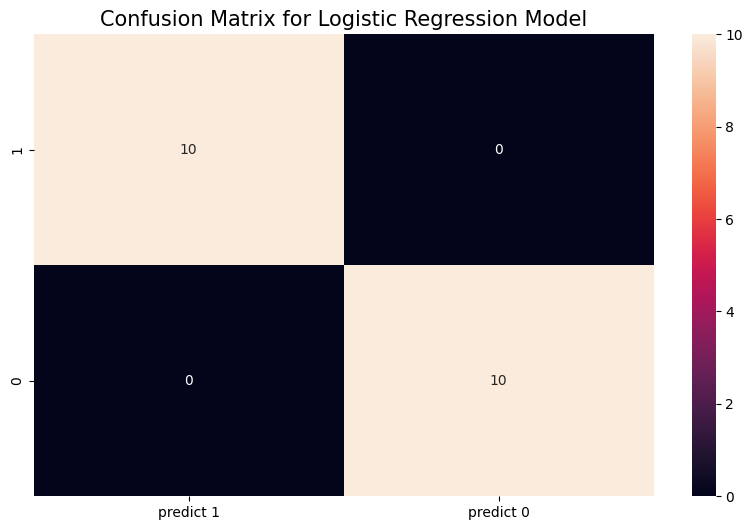

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax= plt.subplots(1, 1, figsize = (10, 6))
plt.title('Confusion Matrix for Logistic Regression Model', size=15)
sns.heatmap(logistic_cm_df, annot= True, fmt='g',ax=ax)
plt.show()

In [58]:
print('Logistic Regression Model - Classification Report')
print('')
print(metrics.classification_report(test_y, test_predict, labels=[1,0]))

Logistic Regression Model - Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           0       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# 3.Decision Tree
### 1. 의사결정나무 정의


> 의사 결정 규칙과 그 결과물들을 트리 구조로 도식화 한 것


### 2. 의사결정나무 알고리즘



> 1.  뿌리마디
2.   중간마디
3. 끝마디
4. 깊이



### 3. 변수 중요도
#### 3.1 정보이득(불순도)


*   엔트로피 지수  
  - 정보 이론에서, 정보의 불확실함의 정도를 타나내는 양, 데이터를 잘 구분할 수 없을 수록 엔트로피는 커진다.
  - 정보 이득의 최대화 -> 불순도의 감소 -> 엔트로피의 감소
*   지니 지수
  - 불평등의 정도를 나타낸 통계학적 지수
  - 데이터가 비슷하게 있을수록 지니 지수는 높아짐
  - 정보 이득의 최대화 -> 불순도의 감소 -> 지니 지수 감소
-> 종속변수가 연속형 변수인 경우 MSE를 이용한 분산량 감소로 구분

### 4. 노드를 나누는 방법
#### 4.1 범주형 변수

- 데이터의 특성의 유무로 분할을 한다.
- 정보 이득을 최대화 하는 분할을 선택한다.

#### 4.2 연속형 변수

- 특성의 유무로 나눌 수 없다.
- 경계값을 찾고 경계값과의 비교를 통해 데이터를 분할한다.

#### 4.3 Feature Importance(변수 중요도)

- 의사결정나무에서 어떤 변수가 가장 중요한지를 나타내는 정도
- 불순도를 가장 크게 감소시키는 변수의 중요도가 가장 크다
- 불순도의 감소는 정보 이득의 최대화와 동일한 뜻

### 5.가지치기

#### 5.1 사전 가지치기(Pre-Pruning)

- 의사결정나무의 최대 Depth나 노드의 최소 개수를 미리 지정해 더 이상의 분할이 일어나지 않게 하는 방법  

#### 5.2 사후 가지치기(Post-Pruning)

- 의사결정나무를 만든 후 데이터가 적은 노드를 삭제 or 병합

#### 5.3 장점

- 모델의 예측 결과를 해석하고 이해하기 쉽다.
- 데이터를 가공할 필요가 거의 없다.

#### 5.4 단점

- 연속형 변수를 범주형 값으로 취급하기 때문에 분리의 경계점 부근에서 예측 오류가 클 수 있다.
- 노이즈 데이터에 영향을 크게 받는다.
- Overfitting 문제가 발생하기 쉽다.


In [59]:
# random data
np.random.seed(2021)
data = {
    "value": [30, 120, 150, 390, 400, 300, 500],
    "label": [0, 0, 1, 0, 0, 1, 0]
}
data = pd.DataFrame(data)
# 변수값의 따라 정렬
sorted_data = data.sort_values(by="value")
# reset index
sorted_data = sorted_data.reset_index(drop=True)

In [60]:
sorted_data

,value,label
0,30,0
1,120,0
2,150,1
3,300,1
4,390,0
5,400,0
6,500,0


In [61]:
# 정답이 바뀌는 지점 찾기
boundary = sorted_data["label"].diff() != 0
boundary[0] = False
boundary_idx = boundary.loc[boundary].index

In [62]:
boundary_idx

Int64Index([2, 4], dtype='int64')

In [63]:
idx_1 = boundary_idx[0]
data.loc[[idx_1-1, idx_1]]
bound_value_1 = data.loc[[idx_1-1, idx_1], "value"].mean()
bound_value_1

135.0

In [64]:
idx_2 = boundary_idx[1]
bound_value_2 = data.loc[[idx_2-1, idx_2], "value"].mean()
bound_value_2

395.0

In [66]:
# 정보이득 계산
def gini_index(label):
    p1 = (label == 0).mean()
    p2 = 1 - p1
    return 1 - (p1 ** 2 + p2 **2)

def concat_gini_index(left, right):
    left_gini = gini_index(left)
    right_gini = gini_index(right)
    all_num = len(left) + len(right)
    left_gini *= len(left) / all_num
    right_gini *= len(right) / all_num
    return left_gini + right_gini

def gini_index(label):
    p1 = (label == 0).mean()
    p2 = 1 - p1
    return 1 - (p1 ** 2 + p2 **2)

[Text(0.5, 0.75, 'x[0] <= 345.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.25, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

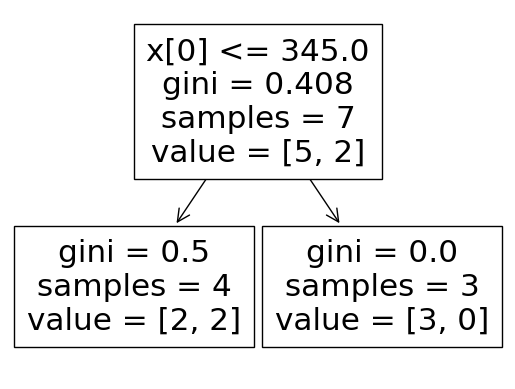

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data["value"].to_frame(), data["label"])
plot_tree(tree)

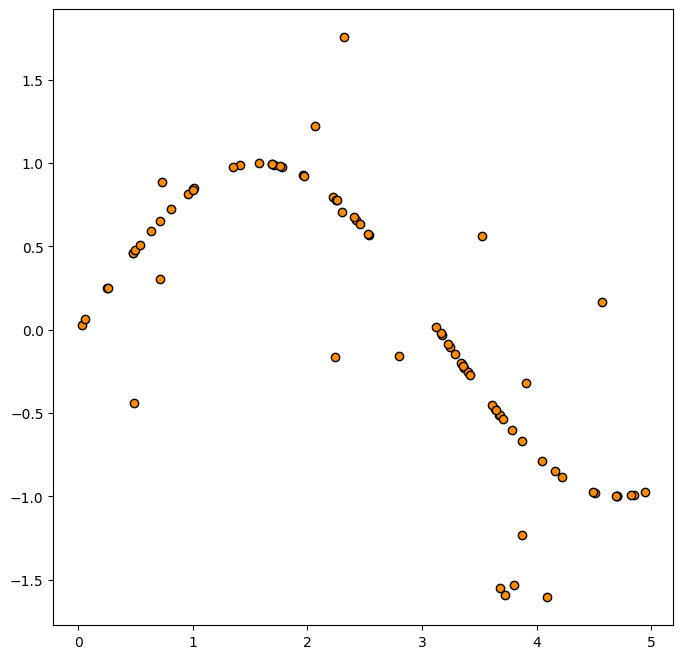

In [69]:
# Sample data 2
data = np.sort(np.random.uniform(low=0, high=5, size=(80, 1)))
label = np.sin(data).ravel()
label[::5] += 3 * (0.5 - np.random.uniform(0, 1, 16))
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.show()

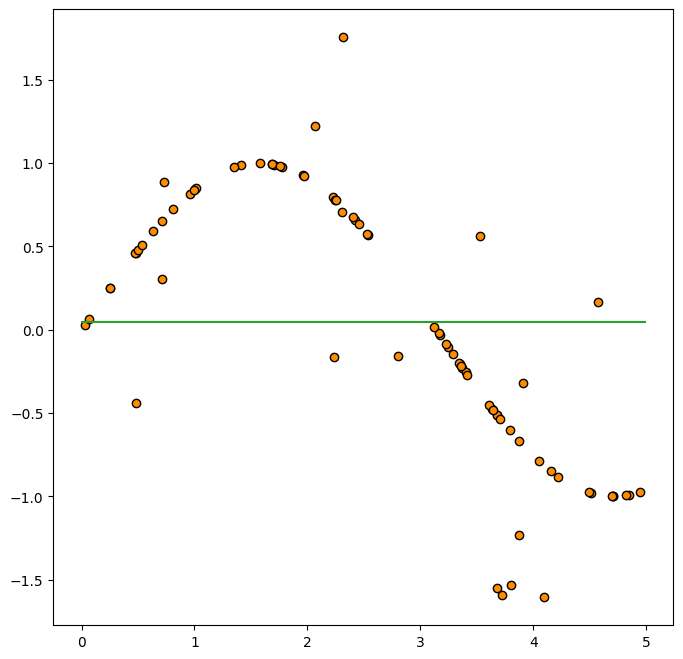

In [71]:
# 시각화를 위한 데이터 생성
viz_test_data = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# 분할이 없을 경우
viz_test_pred = np.repeat(label.mean(), len(viz_test_data))
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, viz_test_pred, color="C2")
plt.show()

In [72]:
train_pred = np.repeat(label.mean(), len(data))
mse_var = np.var(label - train_pred)

print(f"no divide mse variance: {mse_var:.3f}")

no divide mse variance: 0.611


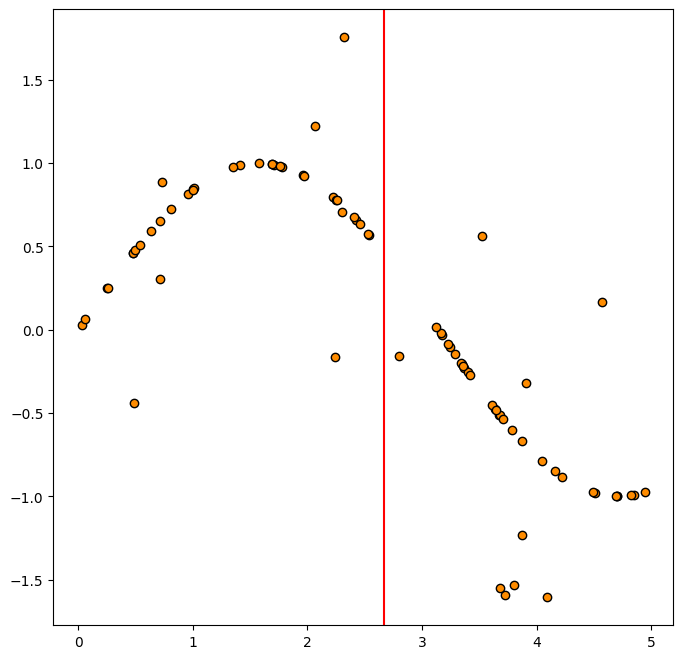

In [75]:
from sklearn.tree import DecisionTreeRegressor

# 첫번째 분할
first_divide = DecisionTreeRegressor(max_depth=1)
first_divide.fit(data, label)
first_divide_pred = first_divide.predict(viz_test_data)

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.show()

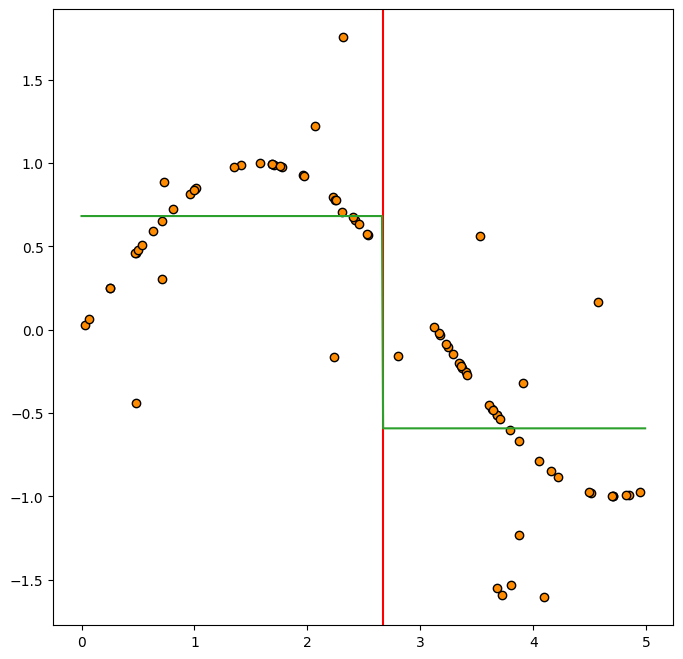

In [77]:
# 분할 후 평균 계산
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.axvline(first_divide.tree_.threshold[0], color="red")
plt.plot(viz_test_data, first_divide_pred, color="C2")
plt.show()

[Text(0.5, 0.75, 'x[0] <= 2.669\nsquared_error = 0.611\nsamples = 80\nvalue = 0.045'),
 Text(0.25, 0.25, 'squared_error = 0.15\nsamples = 40\nvalue = 0.682'),
 Text(0.75, 0.25, 'squared_error = 0.261\nsamples = 40\nvalue = -0.592')]

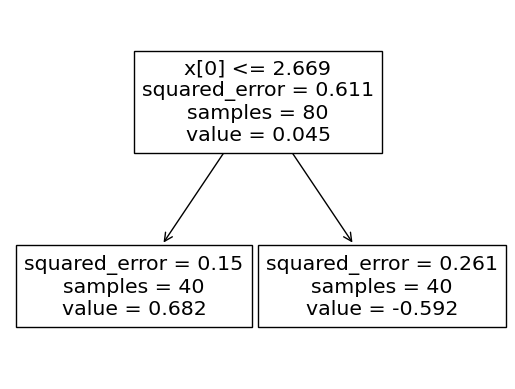

In [78]:
plot_tree(first_divide)
# 첫번째 축은 2.669으로 나눴다. 왼쪽은 오차가 0.15, 오른쪽은 0.261, 왼쪽 평균은 0.682, 오른쪽 평균은 -0.592으로 나왔다.

[Text(0.5, 0.8333333333333334, 'x[0] <= 2.669\nsquared_error = 0.611\nsamples = 80\nvalue = 0.045'),
 Text(0.25, 0.5, 'x[0] <= 0.711\nsquared_error = 0.15\nsamples = 40\nvalue = 0.682'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.081\nsamples = 11\nvalue = 0.268'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.087\nsamples = 29\nvalue = 0.839'),
 Text(0.75, 0.5, 'x[0] <= 3.68\nsquared_error = 0.261\nsamples = 40\nvalue = -0.592'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.06\nsamples = 19\nvalue = -0.198'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.176\nsamples = 21\nvalue = -0.948')]

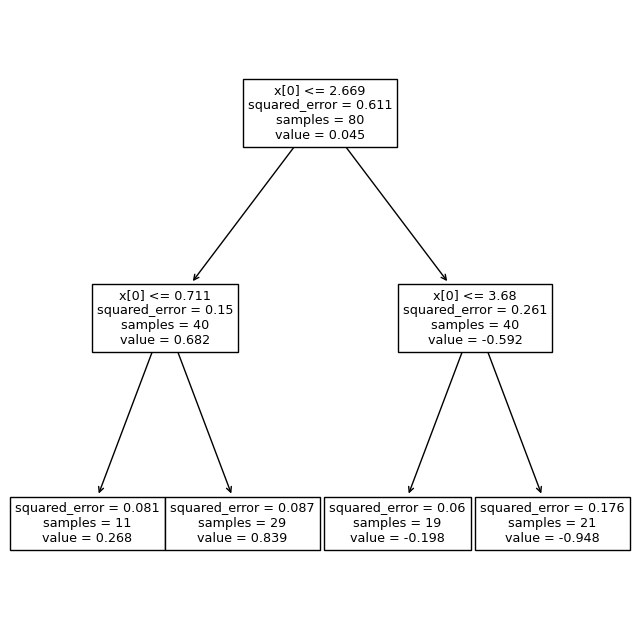

In [79]:
# 두번째 분할
second_divide = DecisionTreeRegressor(max_depth=2)
second_divide.fit(data, label)
second_divide_pred = second_divide.predict(viz_test_data)
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, second_divide_pred, color="C2")
plot_tree(second_divide)

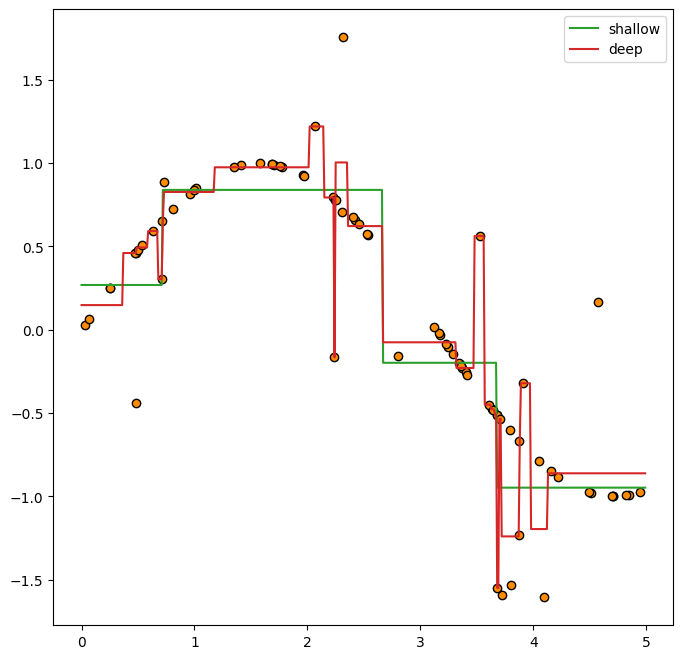

In [80]:
# Depth에 따른 변화
shallow_depth_tree = DecisionTreeRegressor(max_depth=2)
deep_depth_tree = DecisionTreeRegressor(max_depth=5)
shallow_depth_tree.fit(data, label)
deep_depth_tree.fit(data, label)
shallow_pred = shallow_depth_tree.predict(viz_test_data)
deep_pred = deep_depth_tree.predict(viz_test_data)

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(data, label, edgecolor="black", c="darkorange")
plt.plot(viz_test_data, shallow_pred, color="C2", label="shallow")
plt.plot(viz_test_data, deep_pred, color="C3", label="deep")
plt.legend();
# 빨간색은 깊이를 5개를 한것 이고 초록색은 깊이를 2개로 만든 것이다. 빨간색은 이상치에 민감한 것을 확인할 수 있다.
# 깊이가 깊을 수록 과적합 가능성이 높다.

In [81]:
from sklearn.datasets import load_iris
iris = load_iris()
data, target = iris["data"], iris["target"]
pd.DataFrame(data, columns=iris["feature_names"])

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021, stratify=target)

In [82]:
print("train data 개수:", len(train_data))
print("train data 개수:", len(test_data))

train data 개수: 105
train data 개수: 45


[Text(0.4, 0.875, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.375, 'petal length (cm) <= 5.35\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

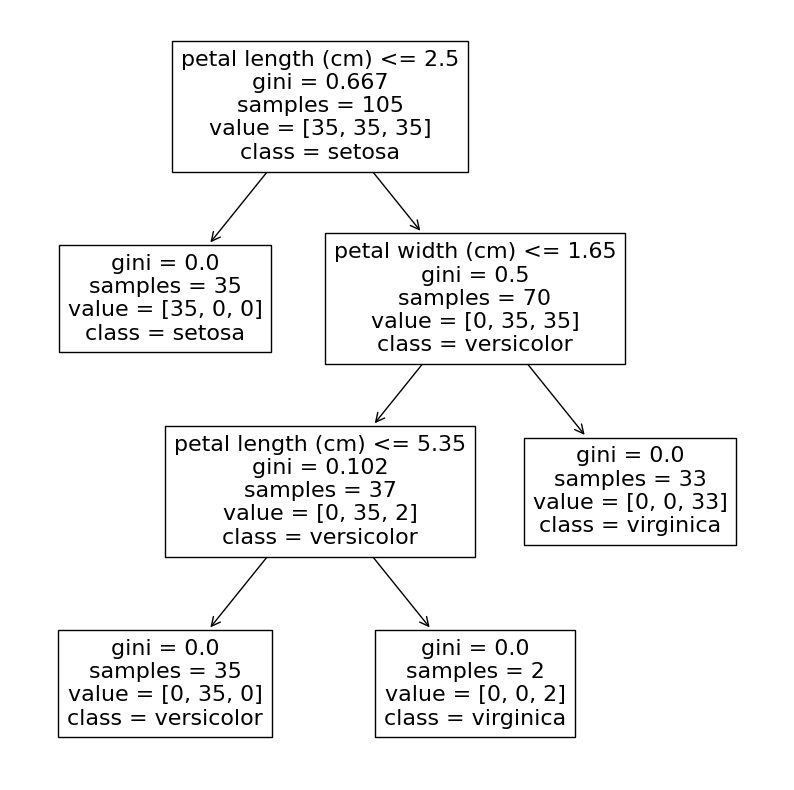

In [83]:
# 모델
gini_tree = DecisionTreeClassifier()

# 학습
gini_tree.fit(train_data, train_target)
plt.figure(figsize=(10,10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

#### DecisionTreeClassifier Arguments
- criterion : 어떤 정보 이득을 기준으로 데이터를 나눌지(geni, entropy)
- max_depth : 나무의 최대 깊이 수
- min_samples_split : 노드가 나눠질 수 있는 최소 데이터 개수

[Text(0.5, 0.75, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor')]

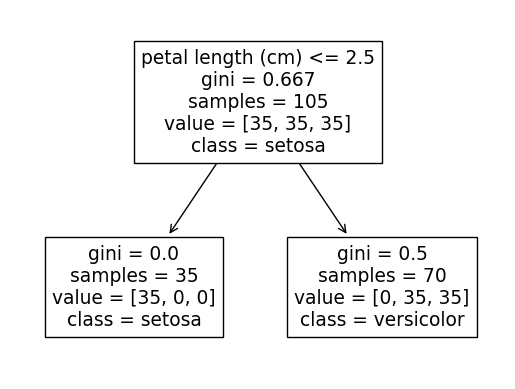

In [84]:
# max_depth
depth_1_tree = DecisionTreeClassifier(max_depth=1)
depth_1_tree.fit(train_data, train_target)

plot_tree(depth_1_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

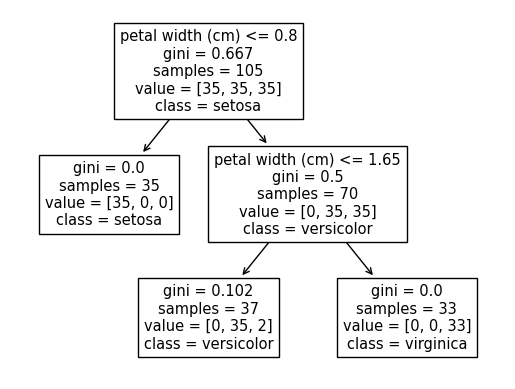

In [85]:
# min_samples_split
sample_50_tree = DecisionTreeClassifier(min_samples_split=50)
sample_50_tree.fit(train_data, train_target)

plot_tree(sample_50_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

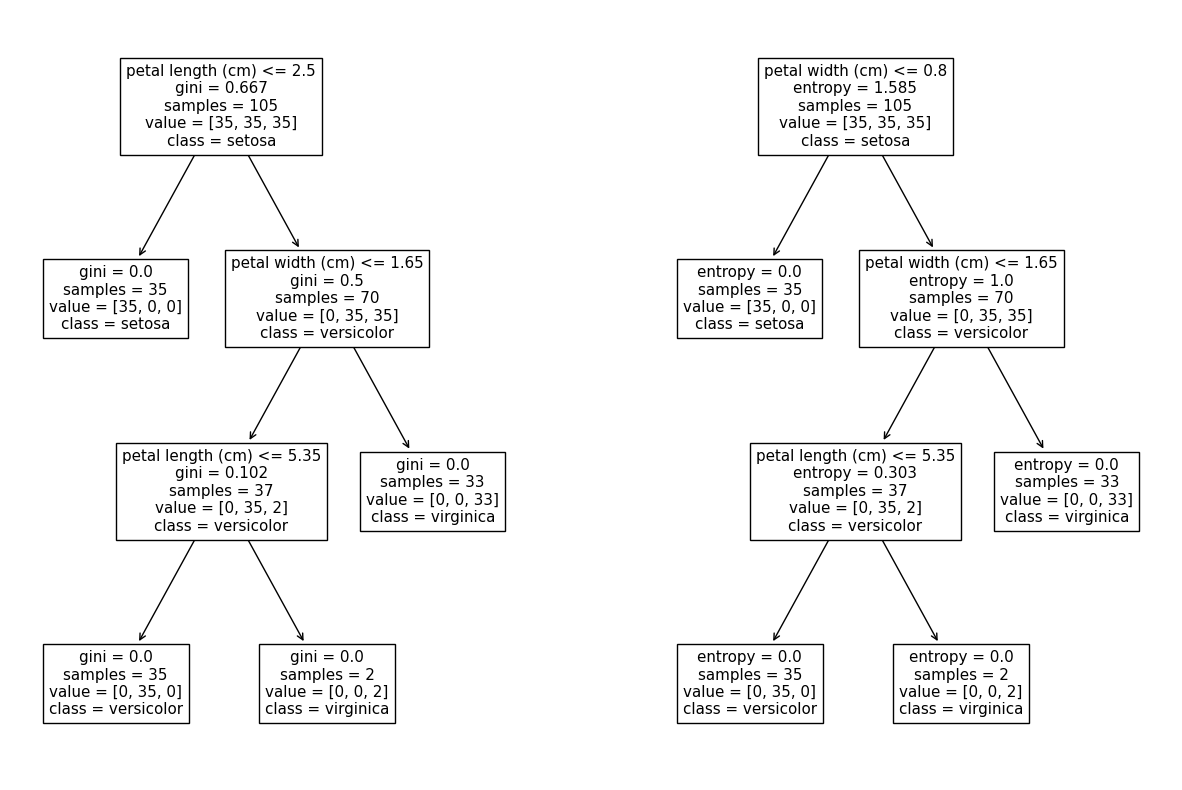

In [86]:
# criterion
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[0])
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[1])
plt.show()

In [87]:
trees = [
    ("gini tree", gini_tree),
    ("entropy tree", entropy_tree),
    ("depth=1 tree", depth_1_tree),
    ("sample=50 tree" ,sample_50_tree),]
train_preds = []
test_preds = []
for tree_name, tree in trees:
    train_pred = tree.predict(train_data)
    test_pred =  tree.predict(test_data)
    train_preds += [train_pred]
    test_preds += [test_pred]
train_preds

# 평가
from sklearn.metrics import accuracy_score
for idx, (tree_name, tree) in enumerate(trees):
    train_acc = accuracy_score(train_target, train_preds[idx])
    test_acc =  accuracy_score(test_target, test_preds[idx])
    print(tree_name)
    print("\t", f"train accuracy is {train_acc:.2f}")
    print("\t", f"test accuracy is {test_acc:.2f}")

gini tree
	 train accuracy is 1.00
	 test accuracy is 0.91
entropy tree
	 train accuracy is 1.00
	 test accuracy is 0.91
depth=1 tree
	 train accuracy is 0.67
	 test accuracy is 0.67
sample=50 tree
	 train accuracy is 0.98
	 test accuracy is 0.91


In [88]:
# Feature Importance
iris["feature_names"]
gini_tree.feature_importances_
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index=iris["feature_names"])
gini_feature_importance

sepal length (cm)    0.000000
sepal width (cm)     0.000000
petal length (cm)    0.554054
petal width (cm)     0.445946
dtype: float64

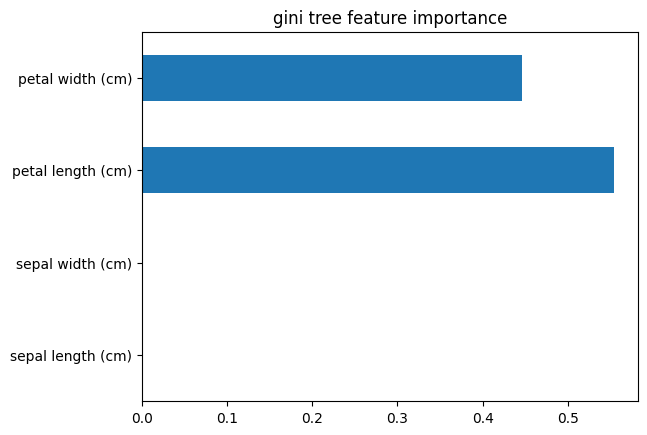

In [90]:
gini_feature_importance.plot(kind="barh", title="gini tree feature importance");

In [93]:
import warnings
warnings.filterwarnings("ignore")

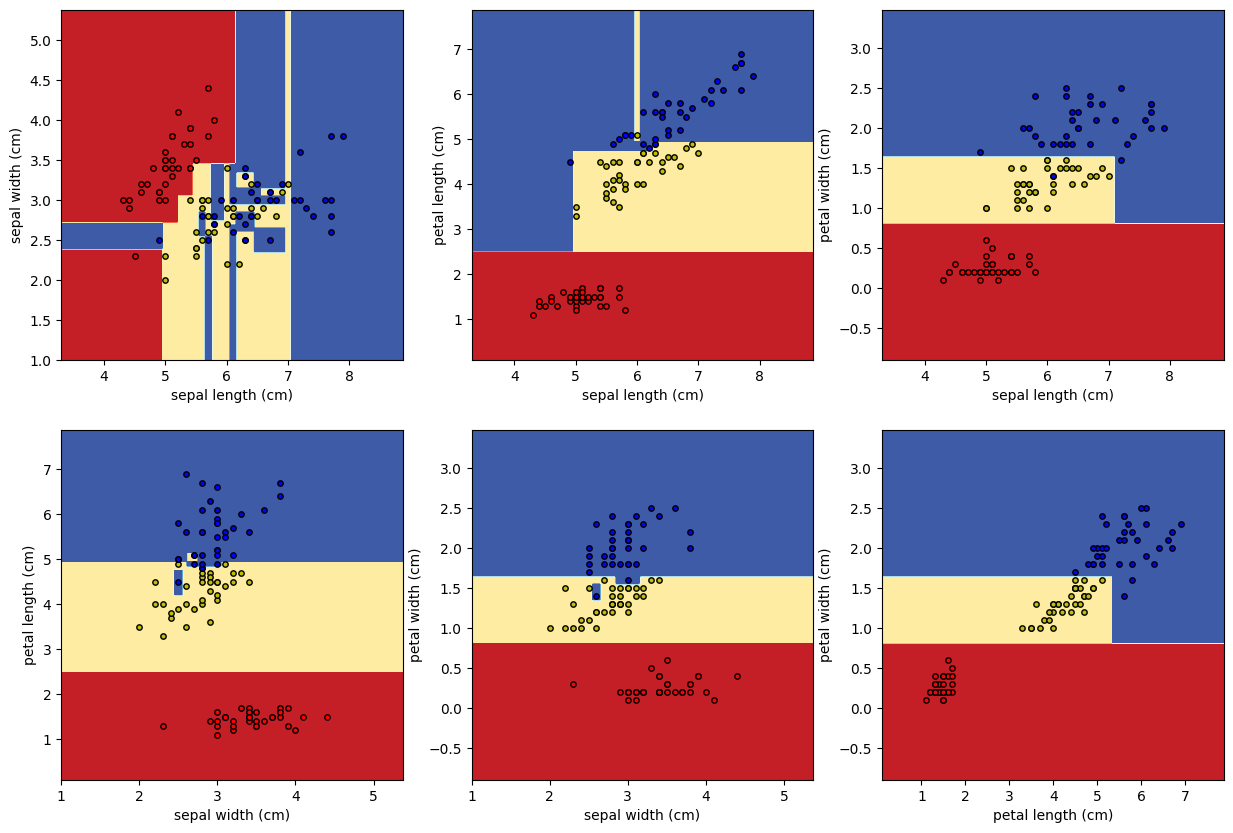

In [94]:
# 시각화
def plot_decision_boundary(pair_data, pair_tree, ax):
    x_min, x_max = pair_data[:, 0].min() - 1, pair_data[:, 0].max() + 1
    y_min, y_max = pair_data[:, 1].min() - 1, pair_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Plot the training points
    for i, color in zip(range(3), "ryb"):
        idx = np.where(train_target == i)
        ax.scatter(pair_data[idx, 0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    return ax
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]
]
for idx, pair in enumerate(pair_combs):
    x, y = pair
    pair_data = train_data[:, pair]
    pair_tree = DecisionTreeClassifier().fit(pair_data, train_target)

    ax = axes[idx//3, idx%3]
    ax = plot_decision_boundary(pair_data, pair_tree, ax)
    ax.set_xlabel(iris["feature_names"][x])
    ax.set_ylabel(iris["feature_names"][y])

# 4.Random Forest
- 랜덤 포레스트는 분류, 회귀 분석 등에 사용하는 앙상블 학습 방법의 일종
- 학습 과정에서 다수의 결정 트리를 만들고, 그 분류를 집계해서 최종 분류 결과를 만듬
- 랜덤하게 트리를 구성함으로써 오버 피팅을 피할 수 있다.

## 앙상블의 정의
  1. bagging
  2. boosting
  3. stacking

## Bagging
  - Bootstrap + Aggregation
  - 약한 분류기들을 결합하여 강 분류기로 만드는 것

## Bootstrap

- Train Data에서 여러 번 복원 추출하는 Random Sampling 기법
- 추출된 샘플들을 부트스트랩 샘플이라고 부른다

## OOB(Out-Of-Bag) 평가

- 추출되지 않은 샘플을 이용해 Cross Validation(교차 검증)에서 Valid 데이터로 사용할 수 있다.

## 약분류기 생성

- 추출된 부트스트랩 샘플마다 약분류기를 학습시킨다

### Aggregation

생성된 약 분류기들의 예측 결과를 Voting을 통해 결합한다.

1. Hard Voting

  예측한 결과값 중 다수의 분류기가 결정한 값을 최종 예측값으로 결정
2. Soft Voting
  분류기가 예측한 확률 값의 평균으로 결정

## Bagging의 장점

- 분산을 줄이는 효과가 있음
    - 원래 추정 모델이 불안정하면 분산 감소 효과를 얻을 수 있다
    - 과대 적합이 심한(High Variance)모델에 적합

## Bagging의 장점

- 분산을 줄이는 효과가 있음
    - 원래 추정 모델이 불안정하면 분산 감소 효과를 얻을 수 있다
    - 과대 적합이 심한(High Variance)모델에 적합

## Random Forest의 정의

- Decision Tree + Bagging
- 분산이 큰 Decision Tree + 분산을 줄일 수 있는 Bagging

## Random Forest와 무작위성(Randomness)

- 무작위성을 더 강조하여서 의사결정나무들이 서로 조금씩 다른 특성을 갖음
- 변수가 20개가 있다면 5개의 변수만 선택해서 의사결정나무를 생성
- 의사결정나무의 예측들이 비상관화되어 일반화 성능을 향상시킨다.

## Random Forest 학습방법

1. Bootstrap 방법으로 T개의 부트스트랩 샘플을 생성한다.
2. T개의 의사결정나무들을 만든다.
3. 의사결정나무 분류기들을 하나의 분류기로 결합한다.

## 장점

- 의사결정나무의 단점인 Overfitting을 해결한다
- 노이즈 데이터에 영향을 크게 받지 않는다.
- 의사결정나무 모델보다 복잡도가 적다

## 단점

- 모델의 예측 결과를 해석하고 이해하기 어렵다.

# 5.Bagging & Stacking
1. Boosting
2. AdaBoost
3. Gradient Boost
4. XGBoost

### Boosting의 정의

- 약 분류기를 순차적으로 학습하는 앙상블 기법
- 예측을 반복하면서 잘못 예측한 데이터에 가중치를 부여해서 오류를 개선한다.

### Bagging

무작위 복원 추출로 부트스트랩 샘플을 추출한다.

### Boosting

부트스트랩 샘플을 추출하는 과정에서 각 자료에 동일한 확률을 부여하는 것이 아니라 분류가 잘못된 데이터에 더 큰 가중을 주어 표본을 추출한다.

1. AdaBoost
    1. Adaptive Boosting
    2. 간단한 약 분류기들이 상호 보완하도록 순차적으로 학습한다.
    3. 과소적합된 학습 데이터의 가중치를 높이면서 새로 학습된 모델이 학습하기 어려운 데이터에 더 잘 적합 되도록 하는 방식이다.
    - 학습방법
        - 전체 학습 데이터를 이용해 모델을 생성
        - 잘못 예측된 데이터의 가중치를 상대적으로 높여 줌
        - 가중치를 반영하여 다음 모델을 학습
        - 2~3 과정을 반복한다
2. Gradient Boost
    1. 학습 전 단계 모델에서의 잔여 오차에 대해 새로운 모델을 학습
    2. 잔여 오차를 예측하여 발전하는 약분류기
    3. 현재까지 학습된 분류기의 약점을 Gradient를 통해 알려주고 이를 중점으로 보완하는 방식
    - 학습 방법
        - 모델을 학습 후 예측값을 계산한다.
        - 잔여 오차를 계산한다.
        - 잔여 오차를 예측하는 트리 모델 생성한다.
        - Learning Rate를 이용해 기존 예측값을 수정한다.
        - 2~4를 반복한다.
3. XGBoost
    1. Gradient Boosting 기반의 모델이다
    2. 트리를 만들 때 병렬 처리를 가능하게 해서 Gradient Boosting의 속도를 개선
    - 특징
        - 병렬/분산 처리
            - CPU 병렬 처리가 가능하다
            - 코어들이 각자 할당받은 변수들로 제각기 가지를 쳐 나간다.
        - Split 지점을 고려할 때 일부를 보고 결정
        - Sparsity Awareness
            - Zero 데이터를 건너 뛰면서 학습
            - 범주형 변수를 dummy화 시킬 경우 학습 속도를 빠르게 할 수 있다

## Boosting 심화

1. Boosting 심화 모델
    1. Light GBM
        1. Gradient Boosting기반의 모델이다.
        2. 약분류기의 학습이 수직적으로 확장하는 leaf-wise 알고리즘을 사용한다.
            1. Tree Growth 종류
                1. Level-Wise Growth
                    1. 뿌리 노드와 가까운 노드부터 데이터를 분할 하는 방법
                    2. 수평 성장
                    3. Random Forest, XGBoost
                2. Leaf_Wise Growth
                    1. Loss변화가 가장 큰 노드부터 데이터를 분할하는 방법
                    2. 수직 성장
                    3. LightGBM
                3. Full Tree
                    1. 모든 끝마디에서의 순도가 100%인 상태
                4. Tree Growth
                    1. Full tree로 학습할 경우 두 방법 모두 최종 결과물은 같다.
                    2. 하지만 보통 Full tree만큼 학습시키지 않기 때문에 중간 결과물의 차이가 있다.
            
            LigithGBM vs XGBoost
            
            - XGBoost에 비해 학습 속도가 빠름
            - 메모리 사용량도 상대적으로 적음
    2. CatBoost
        1. Categorical Boosting
        2. 범주형 변수를 처리하는데 중점을 둔 모델
        3. 기존 GBM기반 모델들이 가지고 있는 범주형 변수 처리 문제를 해결한다.
        4. CatBoost의 범주형 변수를 다루는 방법
            1. Ordered Boosting
                1. 일부만 가지고 잔여 오차를 계산을 한 뒤 모델로 만든다.
                2. 모델이 생성된 뒤의 데이터의 잔여 오차는 최초로 생성된 모델로 예측한 값을 사용한다.
                3. 방법
                    1. 기존의 Boosting 모델이 일괄으로 모든 학습 데이터를 대상으로 잔여 오차를 계산
                    2. 새로운 트리를 만들 때 현재 모델에서 쓰인 데이터의 Gradient를 다시 사용한다.
                    3. 이 경우 모델이 과대 적합 될 수 있다.
                    4. Ordered Boosting을 사용할 경우 Gradient가 계속 갱신되기 때문에 과대 적합을 방지할 수 있다.
            2. Categorical Feature Colbinations
                1. Information gain이 동일한 두 변수를 하나의 변수로 묶는 방법
                2. 데이터 전처리 있어 변수 선택의 부담을 줄여준다.
2. Stacking
    1. Meta Modeling
    2. 다른 모델들의 단점은 극복하고 장점은 취할 수 있는 조합 방법을 찾는 방법
    3. 방법
        1. 학습 데이터를 이용해 Sub Model들을 생성한다.
        2. Sub Model들의 예측값을 데이터로 Meta Model을 생성한다.
        3. 자주쓰는 Sub Model : SVM, Random Forest, KNN
    4. Stacking Regression
        1. Sub Model들의 학습 데이터에 대한 예측값으로 Linear Regression을 학습한다.
        2. 예측에 사용할 경우 Sub Model들의 예측을 먼저 진행 후 그 값을 Meta Model로 예측한다.
    5. Stacking Classification
        1. 분류의 경우 Sub Model의 예측값이 두 개가 있다.
        2. Class 또는 확률
        3. 확률 값을 이용해 Logistirc Regression을 학습한다.
    6. Stacking Multi-class Classification
        1. Multi class의 경우 확률 값이 (p(Y=a), P(Y=b), P(Y=c))로 표시 된다.
        2. 예측값의 shape이 (N, number of classes)가 된다.
        3. k개의 Sub-Model이 있을 경우의 Shape
        4. (N, K, number of classes)
        5. 이 값을 다음과 같이 Reshape을 한다.
        6. (N, K*number of classes)
        7. Reshape된 데이터로 Logistic Regression을 학습한다.

### Boosting 장점

XGBoost : Greedy Algorithm을 사용한 자동 가지치기가 가능해 과대 적합을 방지한다.

LGBM

- XGBoost보다 학습 속도도 빠르며 메모리 사용량도 적다.
- 다만 적은 데이터(1만건 이하)에서는 과대 적합이 발생할 수 있다.

CatBoost

- 범주형 데이터가 많을 때 따로 전처리를 하지 않아도 되며 좋은 성능을 낸다.

## 5.1 Regression

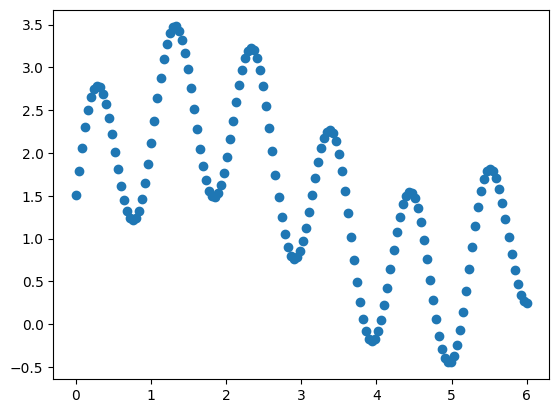

In [118]:
# Sample data 3
np.random.seed(2021)

data = np.linspace(0, 6, 150)[:, np.newaxis]
# 0에서 6까지 150개 데이터로 채우기
# np.newaxis : 차원 늘리기 1차원 -> 2차원

label = np.sin(data).ravel() + np.sin(6 * data).ravel()
# np.ravel() : 2차원 -> 1차원
noise = np.random.normal(data.shape[0]) * 0.01
label += noise
plt.scatter(data, label);

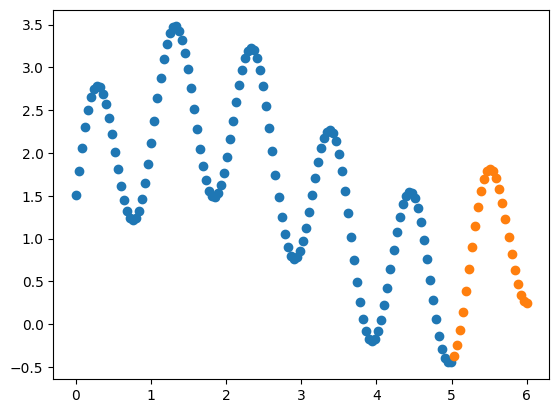

In [119]:
# Data Split
train_size = 125
train_data, test_data = data[:train_size], data[train_size:]
train_label, test_label = label[:train_size], label[train_size:]

plt.scatter(train_data, train_label)
plt.scatter(test_data, test_label, color="C1");

### 5.1.1 Decision Tree

Tree mean squared error is 0.3669
Tree mean squared error is 1.8188


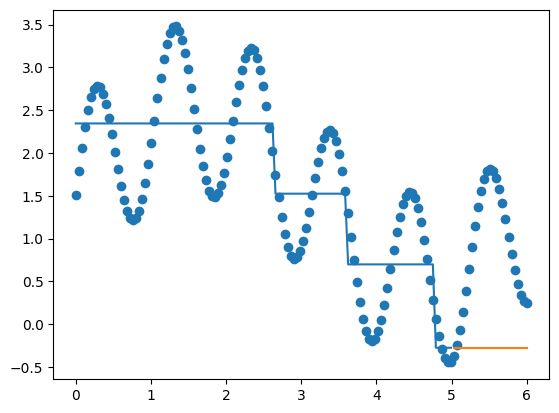

In [120]:
tree = DecisionTreeRegressor(max_depth=2)

# 학습
tree.fit(train_data, train_label)

# 예측
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

# 평가
from sklearn.metrics import mean_squared_error

tree_train_mse = mean_squared_error(train_label, tree_train_pred)
tree_test_mse = mean_squared_error(test_label, tree_test_pred)
print(f"Tree mean squared error is {tree_train_mse:.4f}")
print(f"Tree mean squared error is {tree_test_mse:.4f}")
# Tree mean squared error is 0.3669
# Tree mean squared error is 1.8188

# 시각화
plt.scatter(data, label)
plt.plot(train_data, tree_train_pred)
plt.plot(test_data, tree_test_pred);

### 5.1.2 AdaBoost

Ada Boost Train mean squared error is 0.4634
Ada Boost test mean squared error is 0.6377


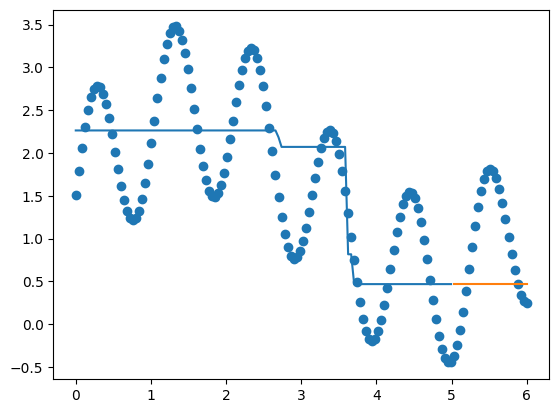

In [101]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))

# 학습
ada_boost.fit(train_data, train_label)

# 예측
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

# 평가
ada_boost_train_mse = mean_squared_error(train_label, ada_boost_train_pred)
ada_boost_test_mse = mean_squared_error(test_label, ada_boost_test_pred)
print(f"Ada Boost Train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Ada Boost test mean squared error is {ada_boost_test_mse:.4f}")

# 시각화
plt.scatter(data, label)
plt.plot(train_data, ada_boost_train_pred)
plt.plot(test_data, ada_boost_test_pred);

### 5.1.3 GradientBoost

Gradient Boost Train mean squared error is 0.2767
Gradient Boost Test mean squared error is 1.3215


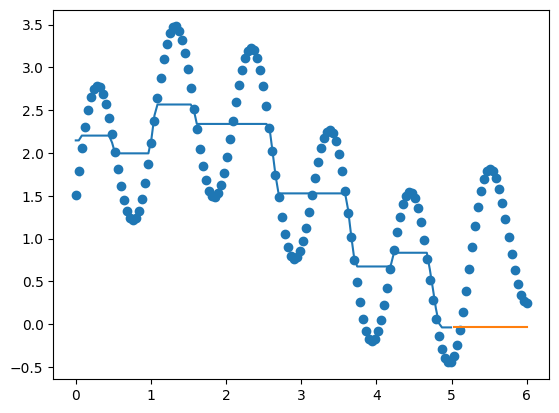

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost = GradientBoostingRegressor(max_depth=1)

# 학습
grad_boost.fit(train_data, train_label)

# 예측
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

# 평가
grad_boost_train_mse = mean_squared_error(train_label, grad_boost_train_pred)
grad_boost_test_mse = mean_squared_error(test_label, grad_boost_test_pred)
print(f"Gradient Boost Train mean squared error is {grad_boost_train_mse:.4f}")
print(f"Gradient Boost Test mean squared error is {grad_boost_test_mse:.4f}")


# 시각화
plt.scatter(data, label)
plt.plot(train_data, grad_boost_train_pred)
plt.plot(test_data, grad_boost_test_pred);

### 5.1.4 Result

Tree train mean squared error is 0.3669
Ada Boost train mean squared error is 0.4634
Gradient Boost train mean squared error is 0.2767

Tree test mean squared error is 1.8188
Ada Boost test mean squared error is 0.6377
Gradient Boost test mean squared error is 1.3215


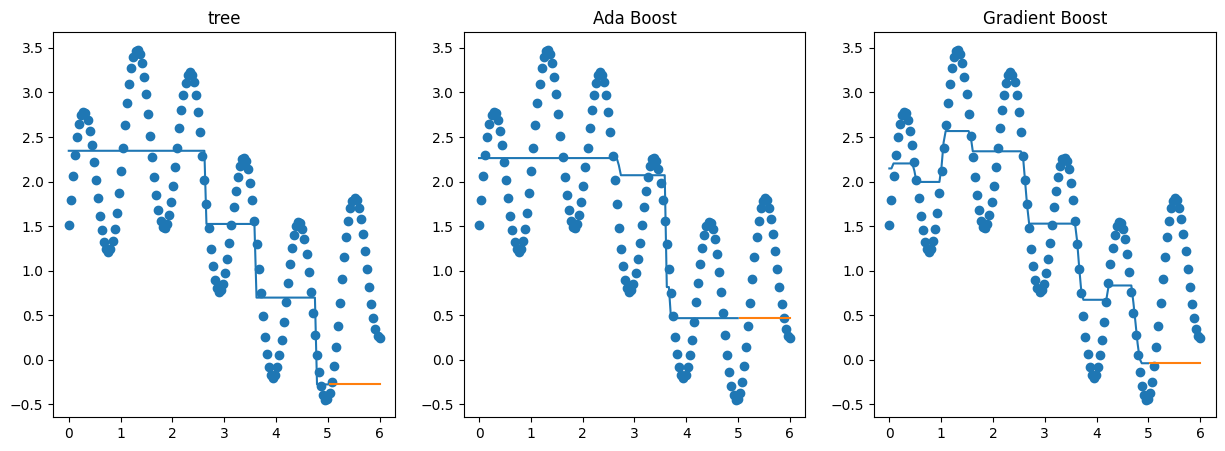

In [105]:
print(f"Tree train mean squared error is {tree_train_mse:.4f}")
print(f"Ada Boost train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Gradient Boost train mean squared error is {grad_boost_train_mse:.4f}")
print('')
print(f"Tree test mean squared error is {tree_test_mse:.4f}")
print(f"Ada Boost test mean squared error is {ada_boost_test_mse:.4f}")
print(f"Gradient Boost test mean squared error is {grad_boost_test_mse:.4f}")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("tree", tree_train_pred, tree_test_pred),
    ("Ada Boost", ada_boost_train_pred, ada_boost_test_pred),
    ("Gradient Boost", grad_boost_train_pred, grad_boost_test_pred)
]
for idx, (name, train_pred, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(data, label)
    ax.plot(train_data, train_pred)
    ax.plot(test_data, test_pred)
    ax.set_title(name)

## 5.2 Classification

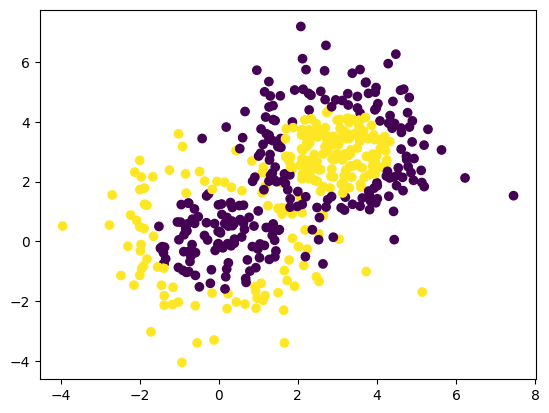

In [108]:
from sklearn.datasets import make_gaussian_quantiles

# 첫 번째 데이터셋 생성
data_1, label_1 = make_gaussian_quantiles(
    cov=2, n_samples=200, n_features=2, n_classes=2, random_state=2021)

# 두 번째 데이터셋 생성 (오타 수정: n_geatures -> n_features)
data_2, label_2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=2021)

# 두 데이터셋 결합
data = np.concatenate((data_1, data_2))
label = np.concatenate((label_1, - label_2 + 1))

# 시각화
plt.scatter(data[:, 0], data[:, 1], c=label)
plt.show()

In [111]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
	data, label, train_size = 0.7, random_state=2021)

# 시각화 데이터
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

### 5.2.1 Decision Tree

Tree train accuray is 0.7286
Tree test accuray is 0.6867


Text(0.5, 1.0, 'test data')

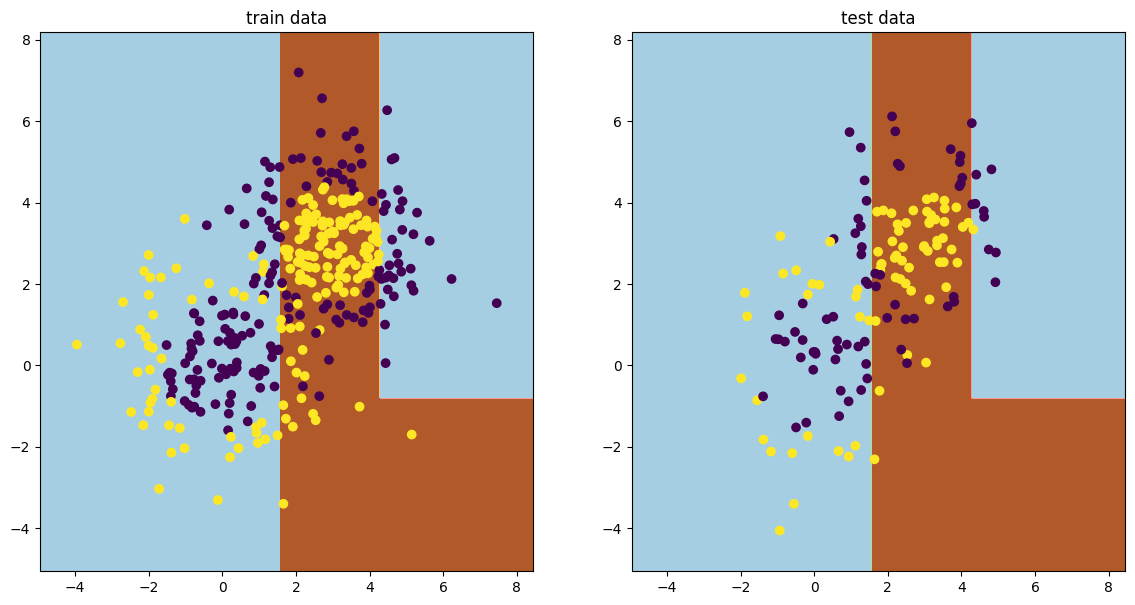

In [112]:
tree = DecisionTreeClassifier(max_depth=2)

# 학습
tree.fit(train_data, train_label)

# 예측
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

# 평가
tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)
print(f"Tree train accuray is {tree_train_acc:.4f}")
print(f"Tree test accuray is {tree_test_acc:.4f}")
# Tree train accuray is 0.7286
# Tree test accuray is 0.6867

# 시각화
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

plt.figure(figsize=(14, 7))
plt.subplot(121)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train data")

plt.subplot(122)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test data")

### 5.2.2 AdaBoost

Ada Boost train accuray is 0.9486
Ada Boost test accuray is 0.8600


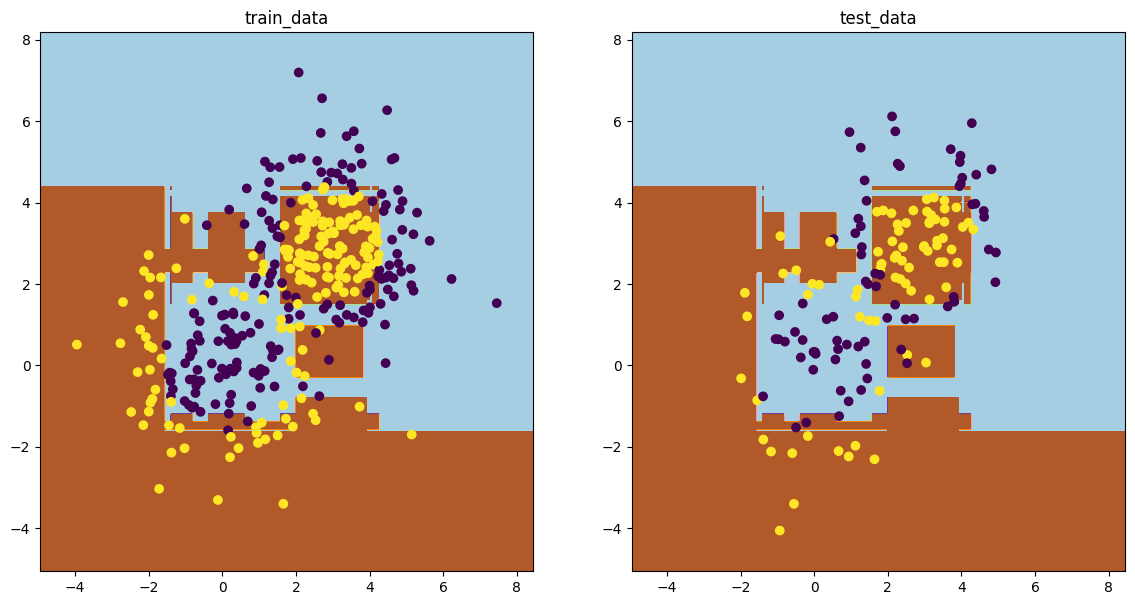

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

# 학습
ada_boost.fit(train_data, train_label)

# 예측
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

# 평가
ada_boost_train_acc = accuracy_score(train_label, ada_boost_train_pred)
ada_boost_test_acc = accuracy_score(test_label, ada_boost_test_pred)
print(f"Ada Boost train accuray is {ada_boost_train_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")
# Ada Boost train accuray is 0.9486
# Ada Boost test accuray is 0.8600

# 시각화
ada_boost_Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
ada_boost_Z = ada_boost_Z.reshape(xx.shape)

plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data");

### 5.2.3 Gradient Boosting

Gradient Boost train accuray is 0.8886
Gradient Boost test accuray is 0.8200


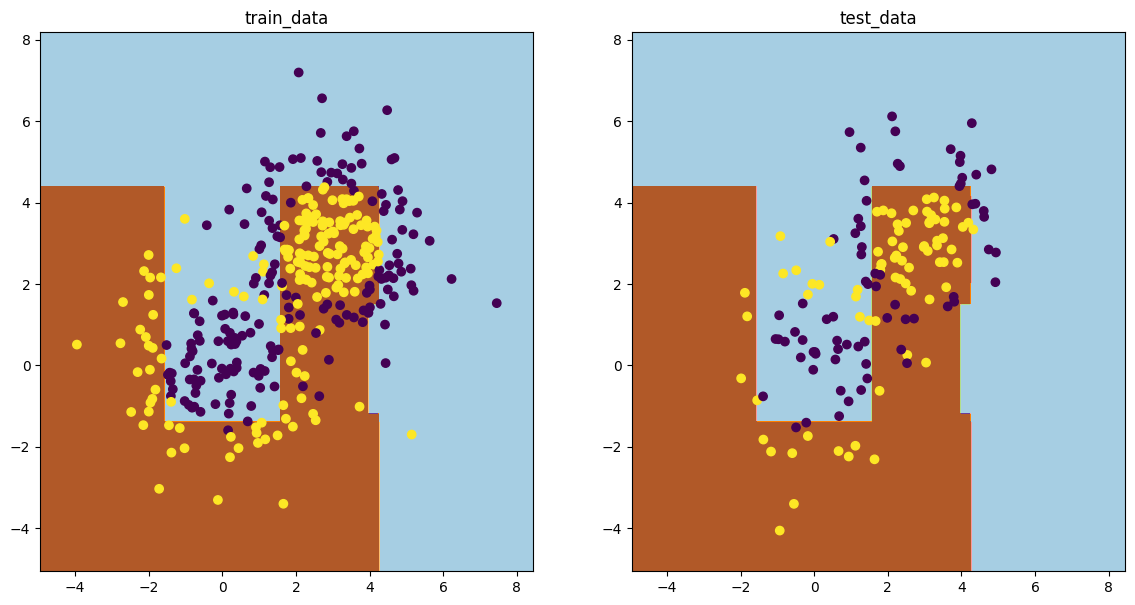

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(max_depth=1)

# 학습
grad_boost.fit(train_data, train_label)

# 예측
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

# 평가
grad_boost_train_acc = accuracy_score(train_label, grad_boost_train_pred)
grad_boost_test_acc = accuracy_score(test_label, grad_boost_test_pred)
print(f"Gradient Boost train accuray is {grad_boost_train_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")
# Gradient Boost train accuray is 0.8886
# Gradient Boost test accuray is 0.8200

# 시각화
grad_boost_Z = grad_boost.predict(np.c_[xx.ravel(), yy.ravel()])
grad_boost_Z = grad_boost_Z.reshape(xx.shape)

plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data");

### 5.2.4 Reuslt

Tree test accuray is 0.6867
Gradient Boost test accuray is 0.8200
Ada Boost test accuray is 0.8600


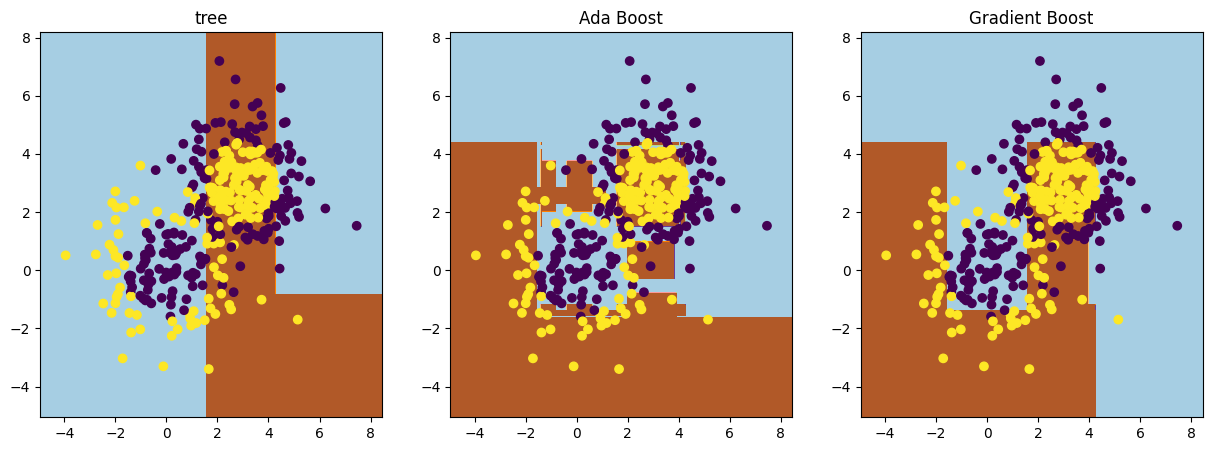

In [116]:
print(f"Tree test accuray is {tree_test_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
Z_name = [
    ("tree", tree_Z),
    ("Ada Boost", ada_boost_Z),
    ("Gradient Boost", grad_boost_Z)
]
for idx, (name, Z) in enumerate(Z_name):
    ax = axes[idx]
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.scatter(train_data[:,0], train_data[:,1], c=train_label)
    ax.set_title(name)

## 5.3 Californial_housing

In [223]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Fetch the data
housing = fetch_california_housing()

# Extract data and target
data, target = housing["data"], housing["target"]

# Perform EDA
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


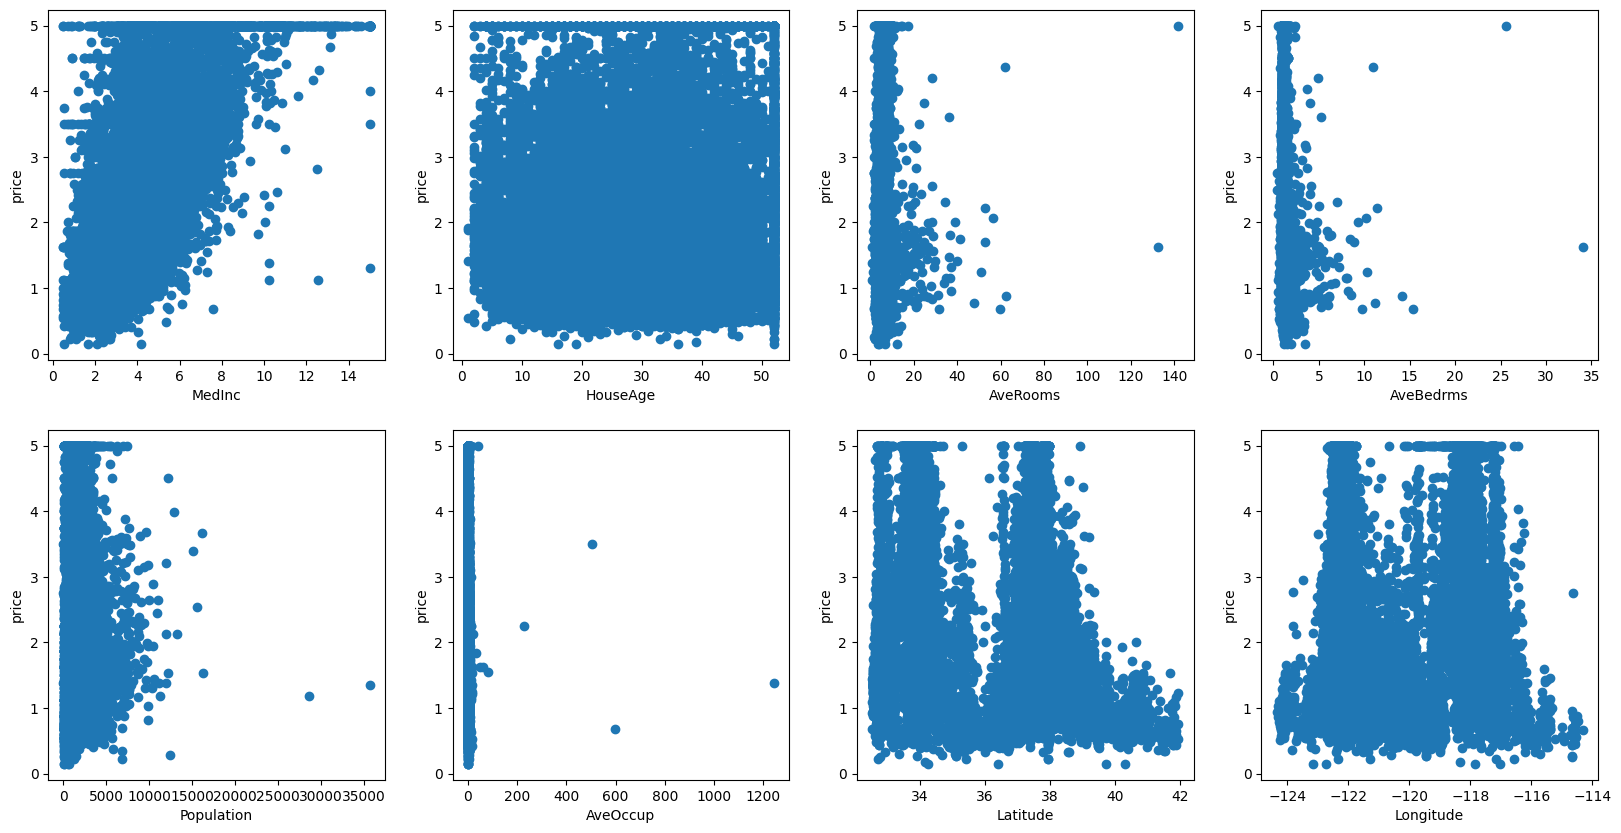

In [224]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 4, i % 4]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")

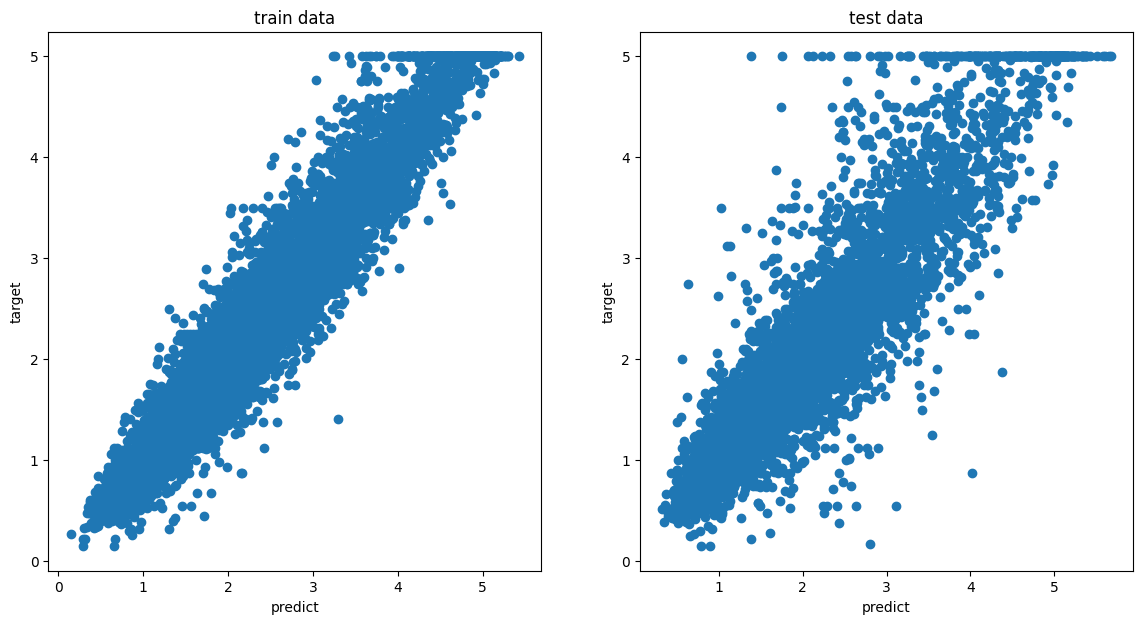

In [241]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
	data, target, train_size=0.7, random_state=2021)

# XGBoost
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()

# 학습
xgb_reg.fit(train_data, train_target)

# 예측
xgb_train_pred = xgb_reg.predict(train_data)
xgb_test_pred = xgb_reg.predict(test_data)

# 시각화
plt.figure(figsize = (14, 7))

plt.subplot(121)
plt.scatter(xgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(xgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target");

In [244]:
# 평가
from sklearn.metrics import mean_squared_error
xgb_train_mse = mean_squared_error(train_target, xgb_train_pred)
xgb_test_mse = mean_squared_error(test_target, xgb_test_pred)

print(f"XGBoost Train MSE is {xgb_train_mse:.4f}")
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")

XGBoost Train MSE is 0.0673
XGBoost Test MSE is 0.2146


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 14447, number of used features: 8
[LightGBM] [Info] Start training from score 2.069350


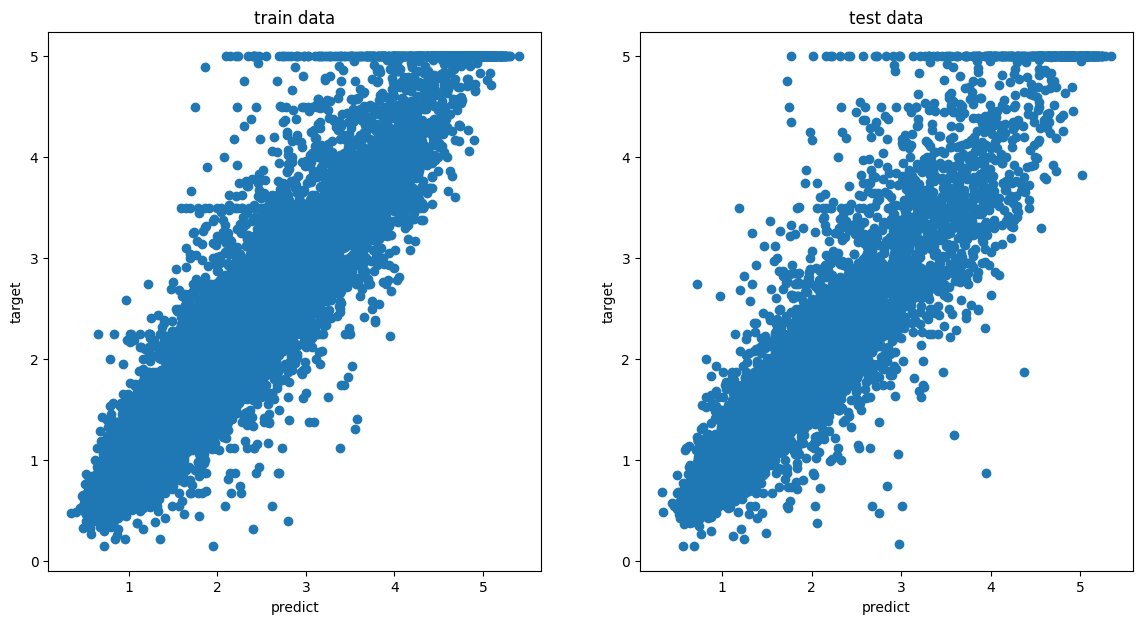

In [245]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()

# 학습
lgb_reg.fit(train_data, train_target)

# 예측
lgb_train_pred = lgb_reg.predict(train_data)
lgb_test_pred = lgb_reg.predict(test_data)

# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(lgb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(lgb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target");

In [246]:
# 평가
lgb_train_mse = mean_squared_error(train_target, lgb_train_pred)
lgb_test_mse = mean_squared_error(test_target, lgb_test_pred)

print(f"Light Boost Train MSE is {lgb_train_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")

Light Boost Train MSE is 0.1543
Light Boost Test MSE is 0.2098


In [236]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


Text(0, 0.5, 'target')

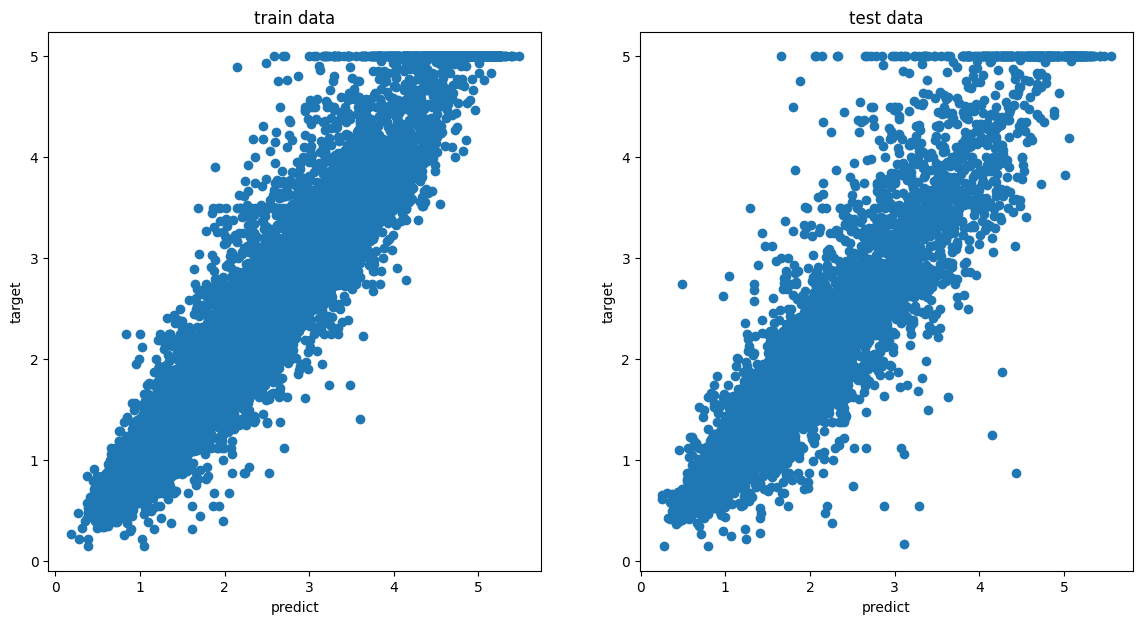

In [237]:
import catboost as cb
cb_reg = cb.CatBoostRegressor()

# 학습
cb_reg.fit(train_data, train_target, verbose=False)

# 예측
cb_train_pred = cb_reg.predict(train_data)
cb_test_pred = cb_reg.predict(test_data)

# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(121)
plt.scatter(cb_train_pred, train_target)
plt.title("train data")
plt.xlabel("predict")
plt.ylabel("target")

plt.subplot(122)
plt.scatter(cb_test_pred, test_target)
plt.title("test data")
plt.xlabel("predict")
plt.ylabel("target");

In [238]:
# 평가
cb_train_mse = mean_squared_error(train_target, cb_train_pred)
cb_test_mse = mean_squared_error(test_target, cb_test_pred)
print(f"Cat Boost Train MSE is {cb_train_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

Cat Boost Train MSE is 0.1163
Cat Boost Test MSE is 0.1938


In [247]:
# Result
print(f"XGBoost Test MSE is {xgb_test_mse:.4f}")
print(f"Light Boost Test MSE is {lgb_test_mse:.4f}")
print(f"Cat Boost Test MSE is {cb_test_mse:.4f}")

XGBoost Test MSE is 0.2146
Light Boost Test MSE is 0.2098
Cat Boost Test MSE is 0.1938


## 5.4 News Classification

In [325]:
# Data
from sklearn.datasets import fetch_20newsgroups
newsgroup = fetch_20newsgroups()
data, target = newsgroup["data"], newsgroup["target"]
data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [326]:
target[0]

7

In [311]:
len(newsgroup["target_names"])

20

In [328]:
newsgroup["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [312]:
text = pd.Series(data, name="text")
target = pd.Series(target, name="target")

df = pd.concat([text, target], 1)
df.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [313]:
df.target.value_counts().sort_index()

0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
Name: target, dtype: int64

In [329]:
df_sample = df.query("16 <= target <= 19")
data = df_sample.text
target = df_sample.target

np.array(data).shape

(1952,)

In [356]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

target = le.fit_transform(target)
target

array([0, 3, 1, ..., 1, 3, 1])

In [357]:
# Data Split
train_data, test_data, train_target, test_target = train_test_split(
	data, target, train_size = 0.7, random_state = 2021)

In [331]:
# Count Vectorize
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')

# 뉴스에 모두 등장한 단어를 사용
cnt_vectorizer = CountVectorizer(tokenizer=word_tokenize)
cnt_vectorizer.fit(train_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CountVectorizer(tokenizer=<function word_tokenize at 0x7a106ea15240>)

In [332]:
len(cnt_vectorizer.vocabulary_)

32012

In [335]:
# 최소 10개의 뉴스에서 등장한 단어를 사용
cnt_vectorizer = CountVectorizer(tokenizer=word_tokenize, min_df=10)
cnt_vectorizer.fit(train_data)

CountVectorizer(min_df=10, tokenizer=<function word_tokenize at 0x7a106ea15240>)

In [336]:
# 최소 10개의 뉴스에서 등장한 단어를 사용
cnt_vectorizer = CountVectorizer(tokenizer=word_tokenize, min_df=10)
cnt_vectorizer.fit(train_data)

CountVectorizer(min_df=10, tokenizer=<function word_tokenize at 0x7a106ea15240>)

In [337]:
train_matrix = cnt_vectorizer.transform(train_data)
test_matrix = cnt_vectorizer.transform(test_data)

In [349]:
test_target.unique()

array([16, 17, 18, 19])

In [358]:
# XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()

# 학습
xgb_clf.fit(train_matrix, train_target)

# 예측
xgb_train_pred = xgb_clf.predict(train_matrix)
xgb_test_pred = xgb_clf.predict(test_matrix)

# 평가
xgb_train_acc = accuracy_score(train_target, xgb_train_pred)
xgb_test_acc = accuracy_score(test_target, xgb_test_pred)
print(f"XGBoost Train accuracy is {xgb_train_acc:.4f}")
print(f"XGBoost Test accuracy is {xgb_test_acc:.4f}")

XGBoost Train accuracy is 1.0000
XGBoost Test accuracy is 0.9215


In [320]:
# Light GBM
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(train_matrix.toarray(), train_target)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12064
[LightGBM] [Info] Number of data points in the train set: 1366, number of used features: 2288
[LightGBM] [Info] Start training from score -1.303440
[LightGBM] [Info] Start training from score -1.261217
[LightGBM] [Info] Start training from score -1.393642
[LightGBM] [Info] Start training from score -1.624931


LGBMClassifier()

In [343]:
# 예측
lgb_train_pred = lgb_clf.predict(train_matrix.toarray())
lgb_test_pred = lgb_clf.predict(test_matrix.toarray())

# 평가
lgb_train_acc = accuracy_score(train_target, lgb_train_pred)
lgb_test_acc = accuracy_score(test_target, lgb_test_pred)
print(f"Light Boost train accuracy is {lgb_train_acc:.4f}")
print(f"Light Boost test accuracy is {lgb_test_acc:.4f}")

Light Boost train accuracy is 1.0000
Light Boost test accuracy is 0.9283


In [340]:
# catboost
cb_clf = cb.CatBoostClassifier()

# 학습
cb_clf.fit(train_matrix, train_target, verbose=False)

# 예측
cb_train_pred = cb_clf.predict(train_matrix)
cb_test_pred = cb_clf.predict(test_matrix)

# 평가
cb_train_acc = accuracy_score(train_target, cb_train_pred)
cb_test_acc = accuracy_score(test_target, cb_test_pred)
print(f"Cat Boost train accuracy is {cb_train_acc:.4f}")
print(f"Cat Boost test accuracy is {cb_test_acc:.4f}")

Cat Boost train accuracy is 1.0000
Cat Boost test accuracy is 0.9420


In [359]:
# result
print(f"XGBoost test accuray is {xgb_test_acc:.4f}")
print(f"Light Boost test accuray is {lgb_test_acc:.4f}")
print(f"Cat Boost test accuray is {cb_test_acc:.4f}")

XGBoost test accuray is 0.9215
Light Boost test accuray is 0.9283
Cat Boost test accuray is 0.9420


## 5.5샘플 데이터와 Stacking Regreesion

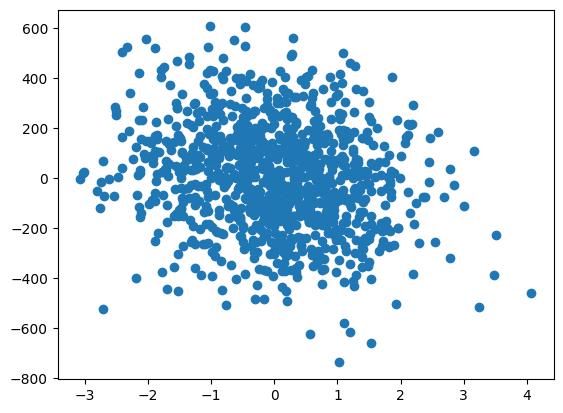

In [275]:
# Data
from sklearn.datasets import make_regression

data, label = make_regression(n_samples=1000, n_features=20, n_informative = 15, noise = 0.1, random_state =1)
data.shape, label.shape
# ((1000, 20), (1000,))

# EDA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_data = pca.fit_transform(data)
plt.scatter(pca_data, label);

In [276]:
# Data Split
train_data, test_data, train_label, test_label = train_test_split(
	data, label, train_size = 0.7, random_state=2021)

In [277]:
# 개별 모델의 성능
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

models = {
		'KNN': KNeighborsRegressor(),
		'tree': DecisionTreeRegressor(),
		'svm': SVR(),
}

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

names = []
results = []
for name, model in models.items():
		result = cross_val_score(model, train_data, train_label, cv = 3, scoring = "neg_mean_absolute_error")
		names += [name]
		results += [result]

import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [278]:
results

[array([-105.03162689, -105.83152462, -102.13684464]),
 array([-175.12141114, -155.64147654, -161.16112724]),
 array([-169.94710581, -171.22395842, -162.4710332 ])]

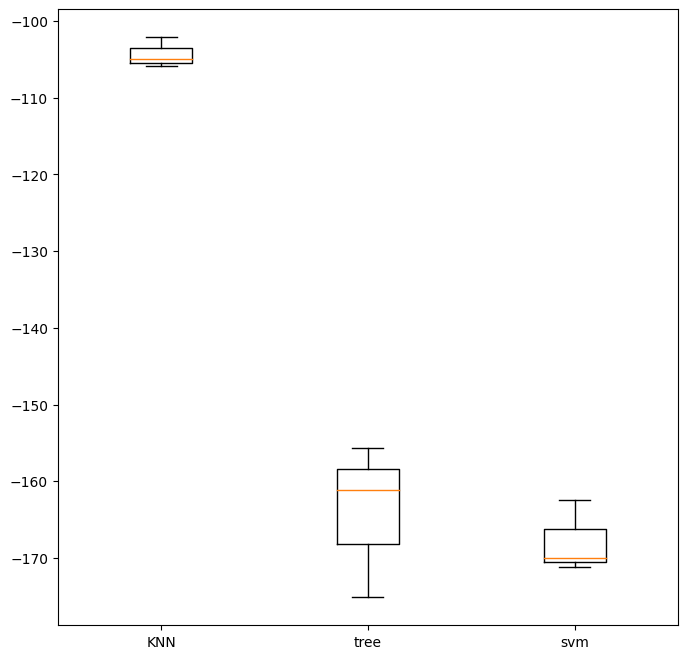

In [279]:
plt.figure(figsize=(8,8))
plt.boxplot(results, labels=names)
plt.show()

In [280]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

Model KNN test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 159.4
Model svm test mean absoulte erorr is 162.6


In [285]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

stacking = StackingRegressor(
		estimators=list(models.items()),
		final_estimator=LinearRegression(),
		cv=3)
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="neg_mean_absolute_error")
stacking_result

array([-96.26610522, -84.24662686, -90.59940853])

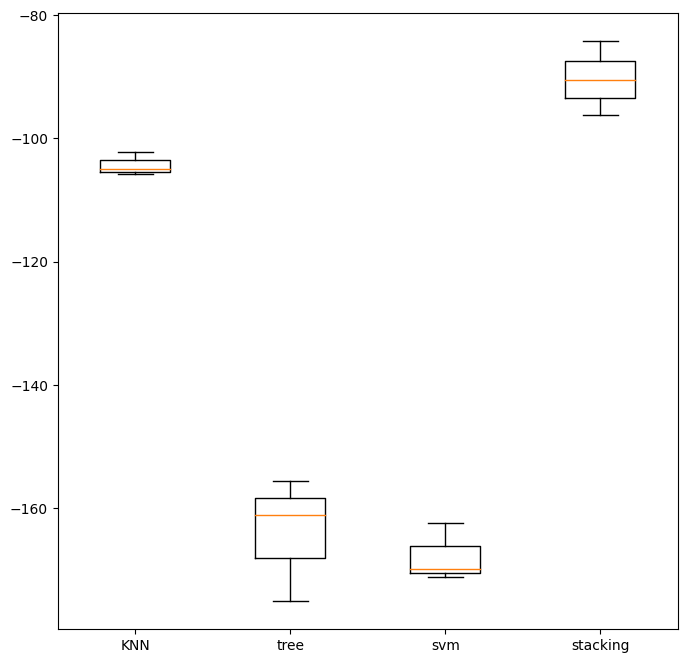

In [286]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [287]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = mean_absolute_error(test_label, test_pred)
    print(f"Model {name} test mean absoulte erorr is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_mae = mean_absolute_error(test_label, stacking_pred)
print(f"Model stacking mean absoulte erorr is {stacking_mae:.4}")

Model KNN test mean absoulte erorr is 97.77
Model tree test mean absoulte erorr is 159.4
Model svm test mean absoulte erorr is 162.6
Model stacking mean absoulte erorr is 82.24


## 5.6샘플 데이터와 Stacking Classification

In [290]:
# Data
from sklearn.datasets import make_classification

data, label = make_classification(
	n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2021)

In [294]:
data.shape

(1000, 20)

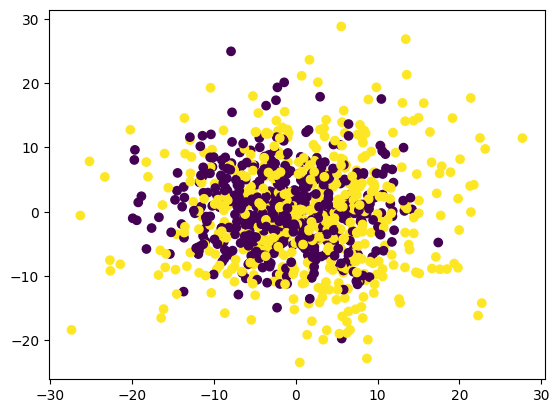

In [297]:
# EDA
from sklearn.decomposition import PCA

# PCA 객체 생성 (예: 2개 주성분으로 축소)
pca = PCA(n_components=2)

# 데이터에 PCA 적용
pca_data = pca.fit_transform(data)
plt.scatter(pca_data[:,0], pca_data[:,1], c=label);

In [298]:
# Data Split
train_data, test_data, train_label, test_label = train_test_split(
	data, label, train_size=0.7, random_state=2021)

In [301]:
from sklearn.naive_bayes import GaussianNB
models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'bayes': GaussianNB()}

In [302]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="accuracy")
    names += [name]
    results += [result]
results

[array([0.79487179, 0.74678112, 0.81545064]),
 array([0.88888889, 0.90128755, 0.86266094]),
 array([0.74786325, 0.78540773, 0.75965665]),
 array([0.91025641, 0.89270386, 0.9055794 ]),
 array([0.75213675, 0.76824034, 0.77253219])]

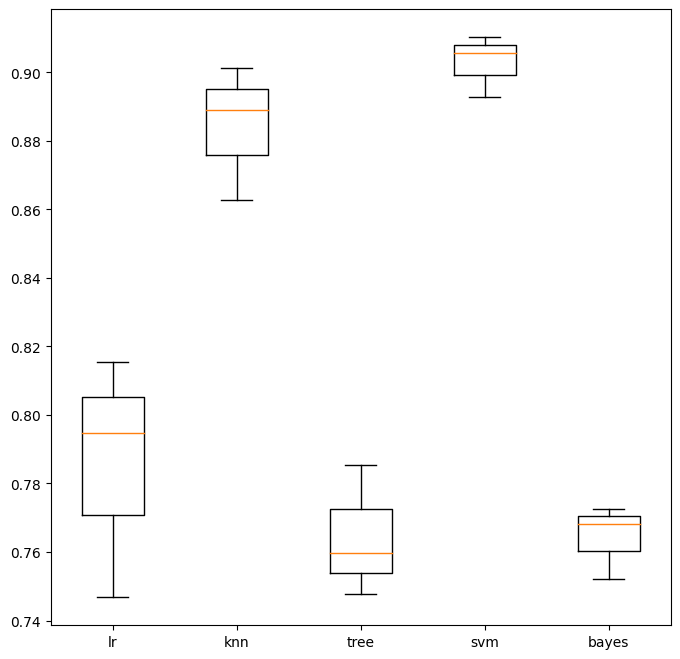

In [303]:
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [304]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7833
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78


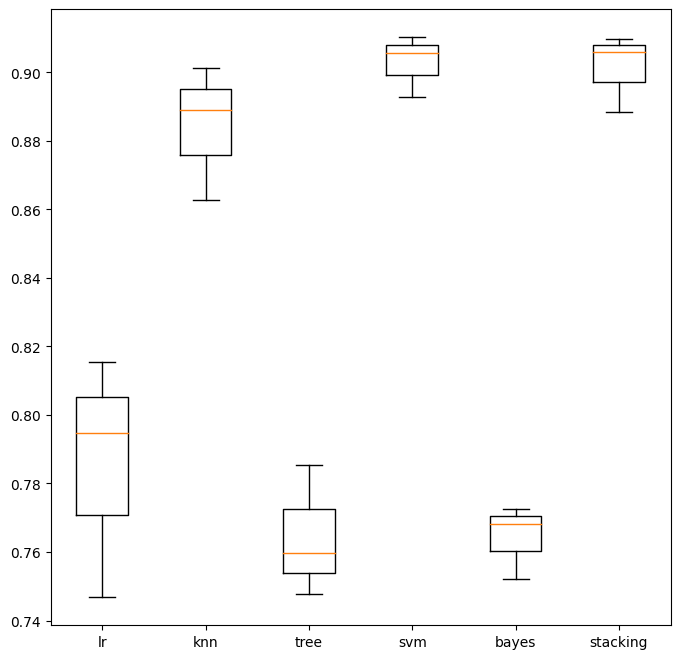

In [306]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(
	estimators=list(models.items()),
	final_estimator=LogisticRegression(),
	cv=3)

stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="accuracy")
stacking_result
# array([0.9017094 , 0.91845494, 0.88841202])

all_result = []
all_result.extend(results)
all_result.append(stacking_result)

plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [307]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_acc = accuracy_score(test_label, stacking_pred)
print(f"Model stacking test accuracy is {stacking_acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7833
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78
Model stacking test accuracy is 0.9267


# 6.Navie Bayes

In [139]:
spam = pd.read_csv("spam.csv", sep=',', names = ['label', 'text' , '1','2','3'] ,encoding='latin1')
spam.drop(['1','2','3'], axis=1, inplace=True)
spam.drop(0, axis = 0, inplace=True)
spam.reset_index(drop=True, inplace=True)
spam.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
spam.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [140]:
spam.label[0]

'ham'

In [143]:
spam.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [148]:
# text 문자 전처리
re_pattern = "[^a-zA-Z0-9\ ]"

In [151]:
# 정규식 True
spam.text = spam.text.str.replace(re_pattern, "", regex=True)
spam.text = spam.text.str.lower()

In [154]:
# Data Split
from sklearn.model_selection import train_test_split

train_text, test_text , train_label, test_label = train_test_split(
spam.text, spam.label, train_size = 0.7, random_state = 2021)

print(f"train_data size: {len(train_label)}, {len(train_label)/len(spam):.2f}")
print(f"test_data size: {len(test_label)}, {len(test_label)/len(spam):.2f}")

train_data size: 3900, 0.70
test_data size: 1672, 0.30


In [156]:
# wordtokenize
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [157]:
# count vectorize
from sklearn.feature_extraction.text import CountVectorizer
# 예시
cnt_vectorizer = CountVectorizer(tokenizer = word_tokenize)
cnt_vectorizer.fit(train_text.iloc[:2])

cnt_vectorizer.vocabulary_

{'that': 5,
 'seems': 4,
 'unnecessarily': 6,
 'hostile': 1,
 'im': 2,
 'done': 0,
 'oredi': 3}

In [158]:
vocab = sorted(cnt_vectorizer.vocabulary_.items(), key=lambda x: x[1])
# sorted lambda x : x[1] : 오름차순 정렬
vocab = list(map(lambda x: x[0], vocab))
# 단어만 추출
vocab

['done', 'hostile', 'im', 'oredi', 'seems', 'that', 'unnecessarily']

In [159]:
sample_cnt_vector = cnt_vectorizer.transform(train_text.iloc[:2]).toarray()
sample_cnt_vector

array([[0, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 0]])

In [160]:
train_text.iloc[:2].values
pd.DataFrame(sample_cnt_vector, columns=vocab)

,done,hostile,im,oredi,seems,that,unnecessarily
0,0,1,0,0,1,1,1
1,1,0,1,1,0,0,0


In [161]:
# 학습데이터로 학습
cnt_vectorizer = CountVectorizer(tokenizer = word_tokenize)
cnt_vectorizer.fit(train_text)

CountVectorizer(tokenizer=<function word_tokenize at 0x7a106ea15240>)

In [163]:
len(cnt_vectorizer.vocabulary_)

7769

In [167]:
# 예측
train_matrix = cnt_vectorizer.transform(train_text)
test_matrix = cnt_vectorizer.transform(test_text)

In [168]:
# CountVecotrize는 학습한 단어장에 존재하지 않는 단어가 들어오게 될 경우 무시
cnt_vectorizer.transform(['notabailblewordforcnt']).toarray().sum()

0

In [169]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
naive_bayes = BernoulliNB()

In [173]:
# 학습
naive_bayes.fit(train_matrix, train_label)

# 예측
train_pred = naive_bayes.predict(train_matrix)
test_pred = naive_bayes.predict(test_matrix)

In [174]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_label, train_pred)
test_acc = accuracy_score(test_label, test_pred)

print(f"Train Accuracy is {train_acc:.4f}")
print(f"Test Accuracy is {test_acc:.4f}")

Train Accuracy is 0.9851
Test Accuracy is 0.9707


# 7.KNN
### 모델 학습 방법

1. 모델 기반 학습 (Model-Based Learnig)
    - 데이터로부터 모델을 생성하여 분류/예측 진행
    - Linear Regression, Logistic Regression
2. 사례 기반 학습(Instance-Based Learning)
    - 별도의 모델 생성 없이 인접 데이터를 분류/예측에 사용
    - Lazy Learning
    - 모델을 미리 만들지 않고, 새로운 데이터가 들어오면 계산을 시작
    - KNN, Naive Bayes

KNN(K-Nearest Neighbors)

- k개의 가까운 이웃을 찾는다.
- 학습 데이터 중 k개의 가장 가까운 사례를 사용하여 분류 및 수치 예측

1. 새로운 데이터를 입력 받음
2. 모든 데이터들과의 거리를 계산
3. 가장 가까운 K개의 데이터를 선택
4. K개 데이터의 클래스를 확인
5. 다수의 클래스를 새로운 데이터의 클래스로 예측

최적의 k값 설정

Cross Validation

- 교차 검증을 통해 제일 성능이 좋은 k를 선택해야 한다.
- 예를 들어서 1~10 사이의 k중 제일 성능이 좋은 k를 선택
- k는 홀수로 지정

거리의 종류

- 유클리드 거리 (knn(p = 2)
- 맨해튼 거리 (knn(p = 1)

장점

- 학습 과정이 없다.
- 결과를 이해하기 쉽다.

단점

- 데이터가 많을 수록 시간이 오래 걸린다.
- 지나치게 데이터에 의존적이다.

## 7.1 Iris data

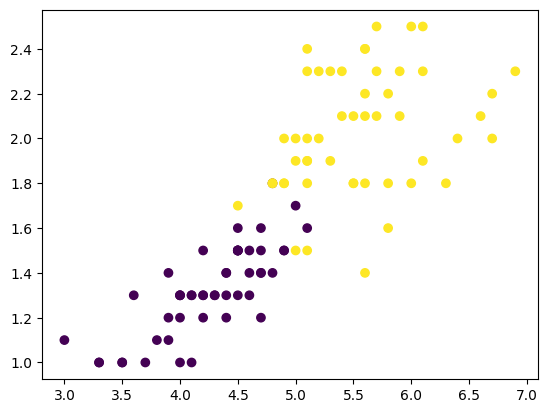

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2022)

# Data set
from sklearn.datasets import load_iris
iris = load_iris()

data = iris.data # x
target = iris.target # y

# target 1= 0, 컬럼 세번째, 네번째만
data = data[target != 0, 2:]
target = target[target != 0]

# 시각화
plt.scatter(data[:, 0], data[:, 1], c=target);

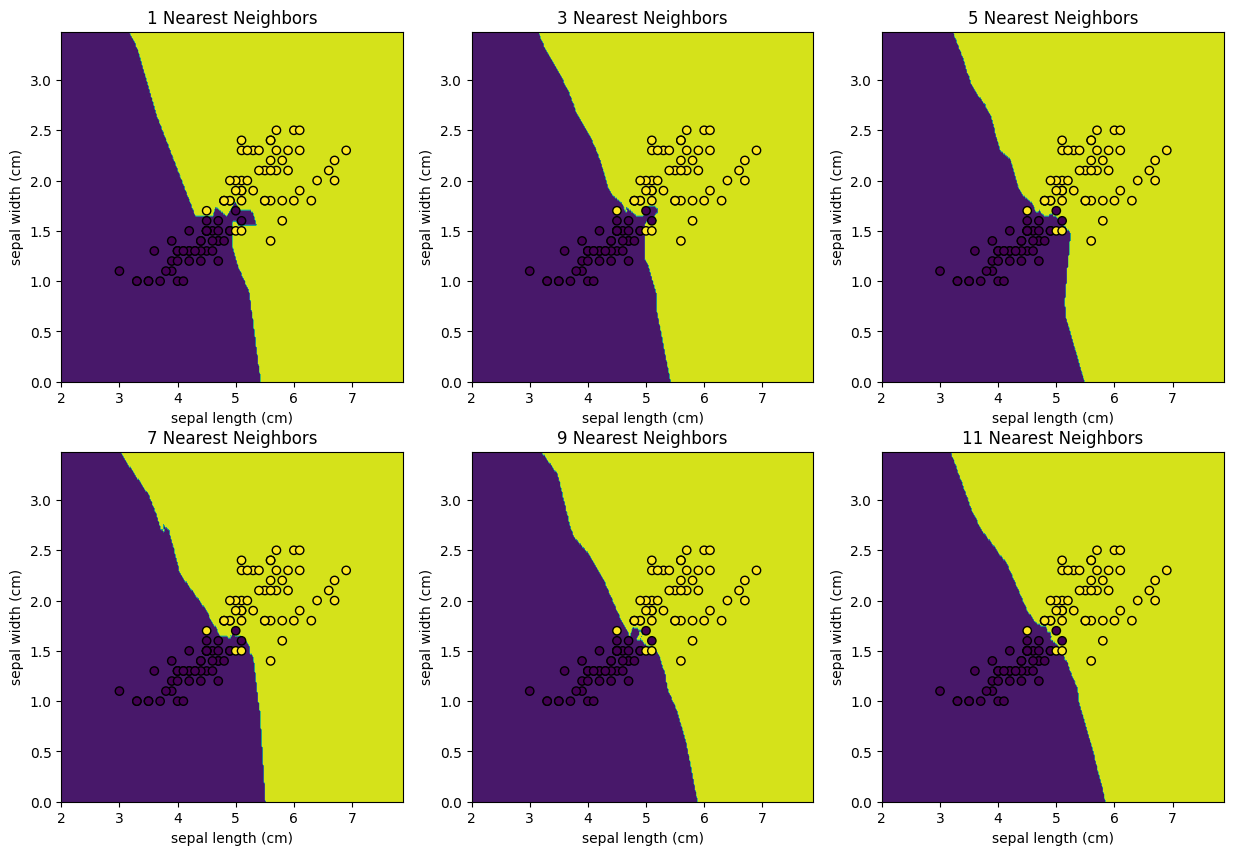

In [182]:
from sklearn.neighbors import KNeighborsClassifier
# x축 y축 설정
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for idx, n in enumerate(range(1, 12, 2)):
    # knn 생성 및 학습
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(data, target)

    # 시각회 데이터 예측
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes[idx//3, idx%3]

    # 영역 표시
    ax.contourf(xx, yy, Z)

    # 데이터 표시
    ax.scatter(
        data[:, 0], data[:, 1], c=target, alpha=1.0, edgecolor="black"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title(f"{n} Nearest Neighbors")

## 7.2 drink water data

In [185]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [186]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [190]:
df.shape

(3276, 10)

In [195]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [196]:
# 결측값이 포함된 행 지우기
data_col = df.dropna()

# 결측값이 포함된 열 지우기
data_row = df.dropna(axis=1)

In [199]:
data_row.drop(['Potability'], axis = 1, inplace = True)

In [201]:
data_row.shape

(3276, 6)

In [202]:
# 열 지운 걸로 진행
train_data, test_data, train_label, test_label = train_test_split(
    data_row, df['Potability'], train_size=0.7, random_state=2021)
print(f"train_data size: {len(train_label)}, {len(train_label)/len(data):.2f}")
print(f"test_data size: {len(test_label)}, {len(test_label)/len(data):.2f}")

train_data size: 2293, 22.93
test_data size: 983, 9.83


In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 파라미터 지정
params = {
    "n_neighbors": [i for i in range(1, 12, 2)],
    "p": [1, 2]
}

# knn은 거리기반으로 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

from sklearn.model_selection import GridSearchCV
# GridSerach n_jobs = -1 : 모든 코어 사용, cv 교차검증에 쓸 폴더 값
scaling_knn = KNeighborsClassifier()
scaling_grid_cv = GridSearchCV(scaling_knn, param_grid=params, n_jobs=-1)
scaling_grid_cv.fit(scaled_train_data, train_label)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11], 'p': [1, 2]})

In [206]:
scaling_grid_cv.best_params_

{'n_neighbors': 9, 'p': 1}

In [207]:
# 예측
scaling_train_pred = scaling_grid_cv.best_estimator_.predict(scaled_train_data)
scaling_test_pred = scaling_grid_cv.best_estimator_.predict(scaled_test_data)

In [208]:
# 평가
scaling_train_acc = accuracy_score(train_label, scaling_train_pred)
scaling_test_acc = accuracy_score(test_label, scaling_test_pred)

print(f"Scaled data train accuracy is {scaling_train_acc:.4f}")
print(f"Scaled data test accuracy is {scaling_test_acc:.4f}")

Scaled data train accuracy is 0.6829
Scaled data test accuracy is 0.5799


# 8.SVM
- 머신 러닝 일종 패턴 인식, 자료 분석을 위한 지도학습 모델
- 주로 분류와 회귀 분석을 위해 사용
- 두 분류로 나눠진 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 학습하여 새로운 데이터가 어느 집합에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다.

### Support Vector Machine(SVM)

SVM은 결정 경계(Decision Boundary)을 정의 하는모델

### Support Vector Machine의 목표

- Margin을 최대화하는 Decision Boundary(결정 경계) 찾기
- 이 때 Support Vector가 Decision Boundary를 만드는데 영향을 주기 때문에 Support Vector Machine이라고 불림

### Support Vector Machine의 구성요소

- Support Vector
    
    두 클래스 사이의 경계에 위치한 데이터 포인트들
    
- Magin
    
    Decision Boundary와 서포트 벡터 사이의 거리 * 2
    
- Decision Boundary
    
    데이터를 나누는 기준이 되는 경계
    

### Hard Margin

- 어떠한 오분류도 허용하지 않음!

### Soft Margin

- 어느 정도의 오분류는 허용 → Penalty
- Penalty의 종류
    1. 0-1 Loss
    2. Hinge Loss

### 0-1 Loss

- Error가 발생한 개수만큼 패널티 계산

### Hinge Loss

- 오분류 정도에 따라 패널티 계산

### 커널 트릭
- 저차원 데이터를 고차원 데이터로 맵핑(Mapping)하는 작업

### 커널 종류

- 선형
- 다항식
- 가우시안 RBF

### 장점

- 비선형 분리 데이터도 커널을 사용하여 분류할 수 있다.
- 고차원 데이터에도 사용할 수 있다.

### 단점

- 데이터가 너무 많으면 속도가 느리다.
- 확률 추정치를 제공하지 않음

In [210]:
iris = load_iris()

data = iris.data
target = iris.target

data = data[target !=0, :2]
target = target[target !=0]

# Data split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.9, random_state=2021)

# Linear Kernel
from sklearn.svm import SVC
linear_svc = SVC(kernel="linear")
linear_svc.fit(train_data, train_target)

# Visualization
def plot_support_vector_machine(svm):
    # 전체 데이터
    plt.scatter(data[:, 0], data[:, 1], c=target, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)
    # test 데이터
    plt.scatter(test_data[:, 0], test_data[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = data[:, 0].min()
    x_max = data[:, 0].max()
    y_min = data[:, 1].min()
    y_max = data[:, 1].max()

    # 영역 칠하기
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, shading="auto")
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

속성

- decision boundary
- support vector
- 영역

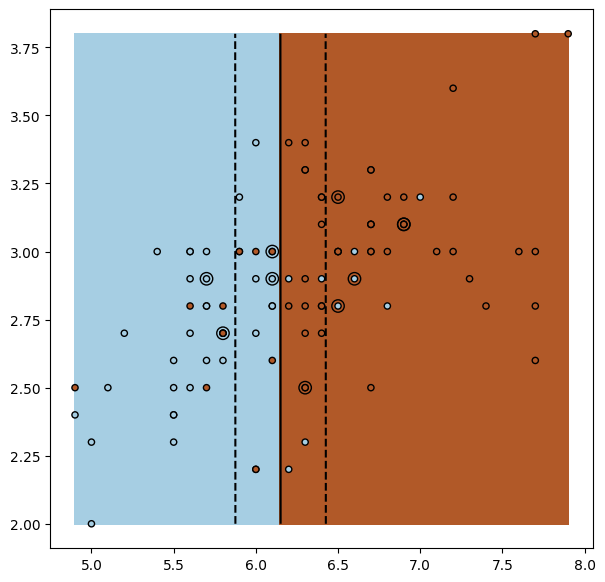

In [211]:
plt.figure(figsize=(7,7))
plot_support_vector_machine(linear_svc)

### Poly Kernel

poly kernel은 직선을 곡선으로 mapping 시켜주는 커널입니다.

- gamma
    - 결정 경계를 스케일링 해주는 값입니다.
- degree
    - 몇 차원의 곡선으로 맵핑할지 정해주는 값입니다.

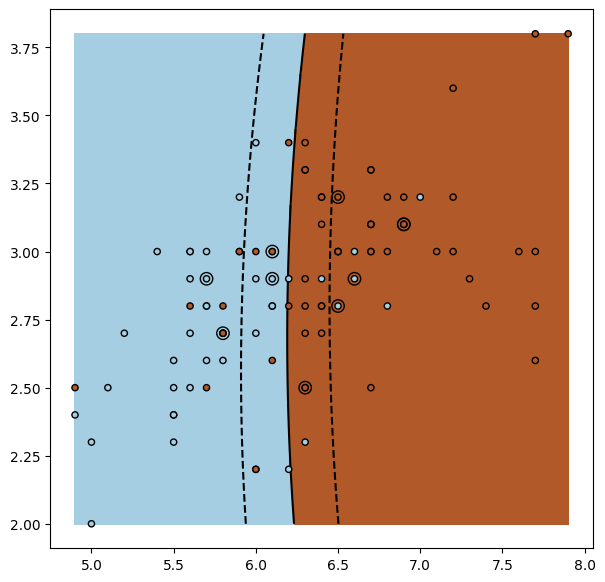

In [212]:
# gamma
poly_svc = SVC(kernel="poly")
poly_svc.fit(train_data, train_target)
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

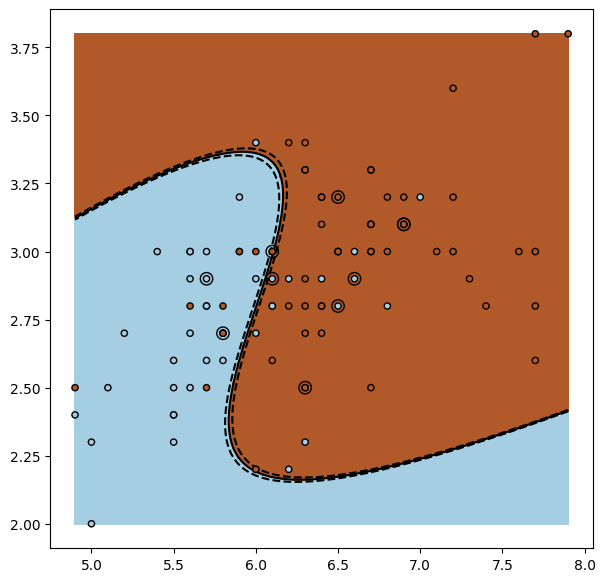

In [213]:
# gamma = 10
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

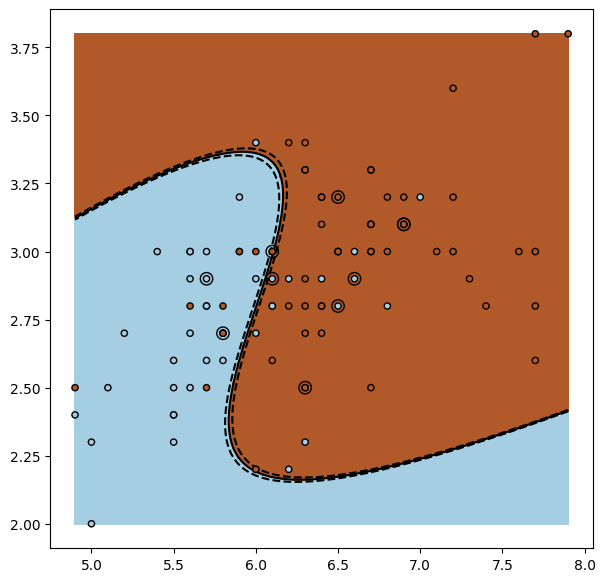

In [214]:
# degree = 2
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

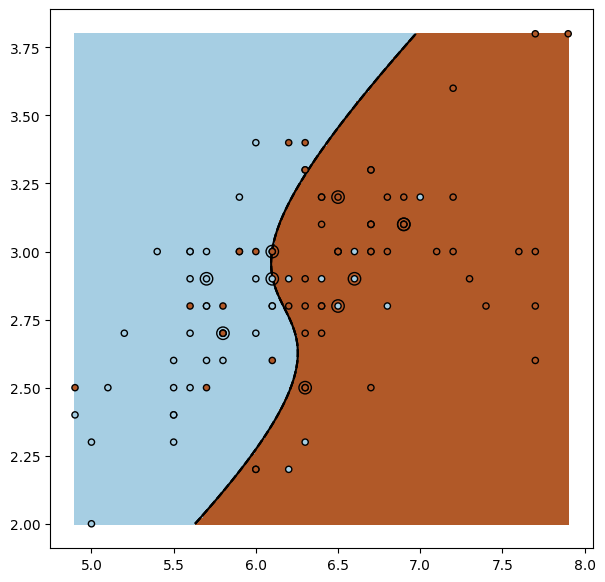

In [215]:
# degree = 4
poly_svc = SVC(kernel="poly", gamma=10, degree=4)
poly_svc.fit(train_data, train_target)
plt.figure(figsize=(7,7))
plot_support_vector_machine(poly_svc)

### RBF Kernel

- RBF Kernel은 데이터를 고차원의 공간으로 mapping시켜줍니다.
- RBF 또한 gamma 값으로 scaling을 합니다

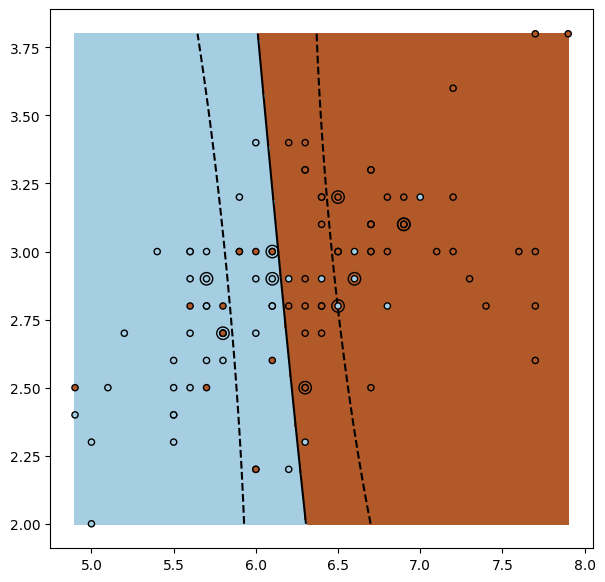

In [216]:
# 기본
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(train_data, train_target)
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

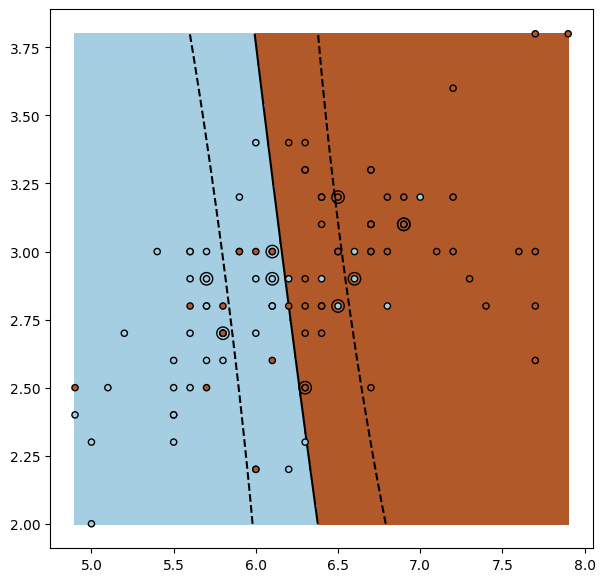

In [217]:
# gamma = 0.1
rbf_svc = SVC(kernel="rbf", gamma=0.1)
rbf_svc.fit(train_data, train_target)
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc)

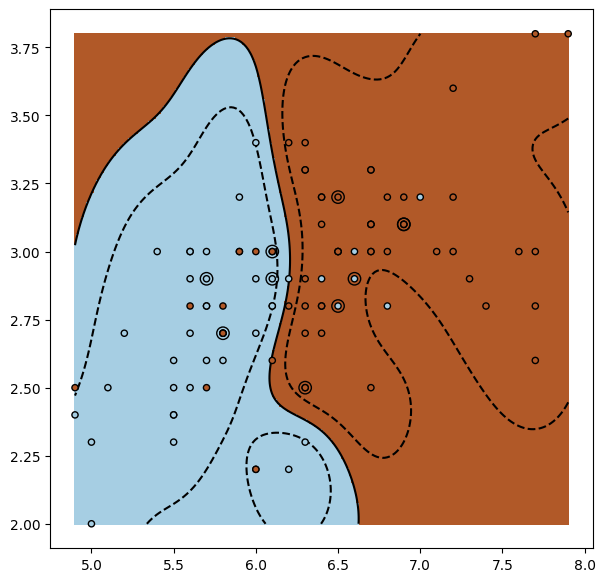

In [218]:
# gamma = 10
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)
plt.figure(figsize=(7, 7))
plot_support_vector_machine(rbf_svc) # 등고선의 형태로 표현이 된다.

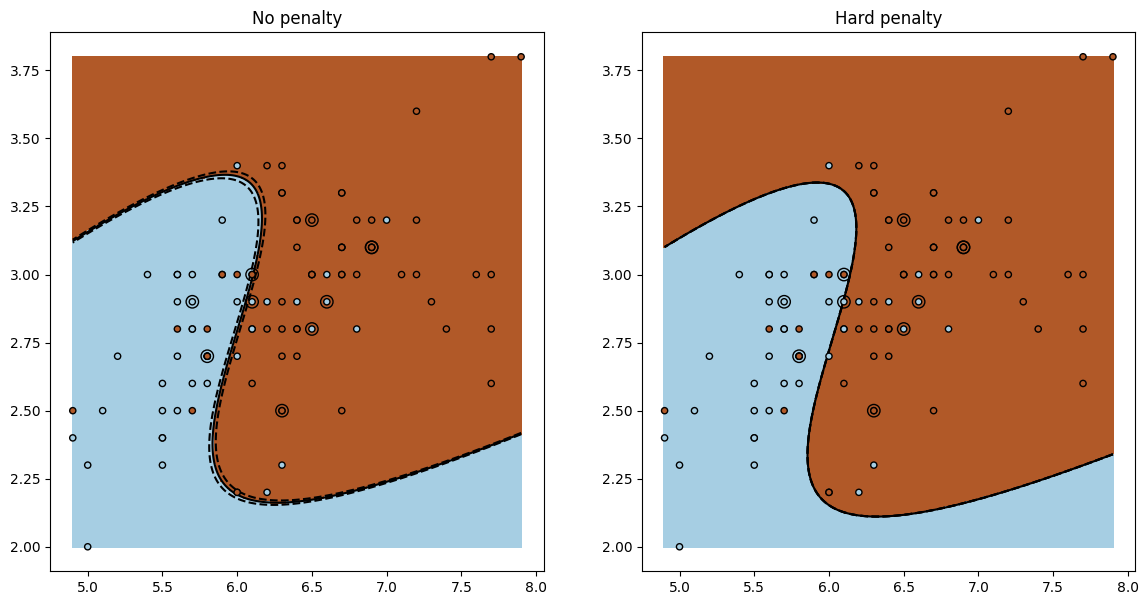

In [221]:
# Penalty
poly_svc = SVC(kernel="poly", gamma=10)
poly_svc.fit(train_data, train_target)
hard_penalty_poly_svc = SVC(kernel="poly", gamma=10, C=100)
hard_penalty_poly_svc.fit(train_data, train_target)
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(poly_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_poly_svc)
plt.title("Hard penalty");
# 왼) No penalty 오) Hard Penalty

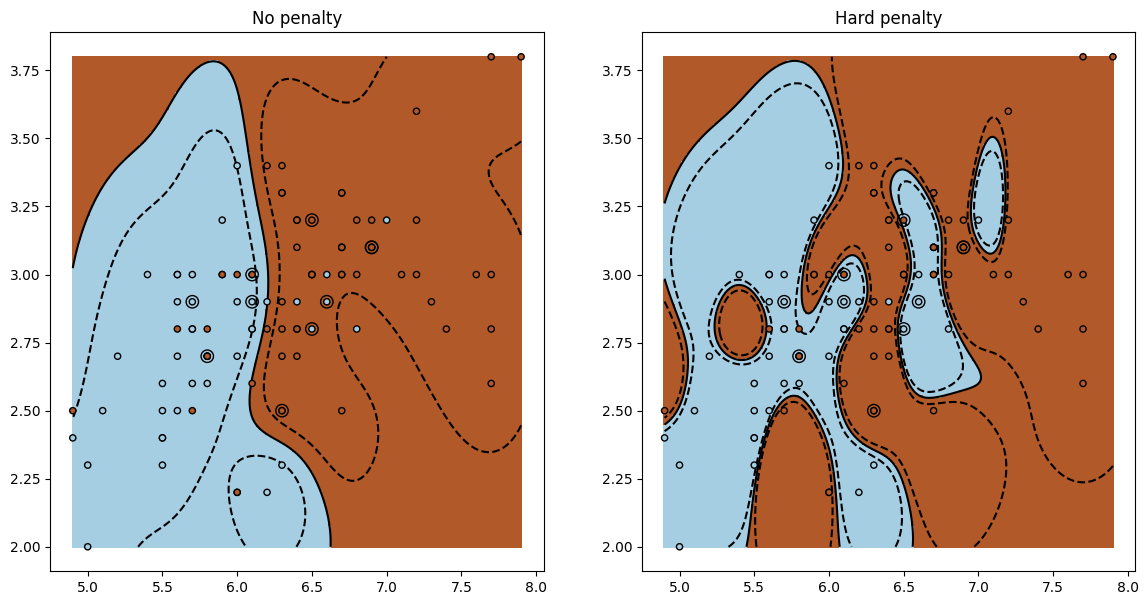

In [220]:
# RBF
rbf_svc = SVC(kernel="rbf", gamma=10)
rbf_svc.fit(train_data, train_target)
hard_penalty_svc = SVC(kernel="rbf", gamma=10, C=100)
hard_penalty_svc.fit(train_data, train_target)
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)
plot_support_vector_machine(rbf_svc)
plt.title("No penalty")
plt.subplot(1,2,2)
plot_support_vector_machine(hard_penalty_svc)
plt.title("Hard penalty");
# SVM은 어떤 argument을 주는지 따라 성능이 크게 바뀌기 때문에 튜닝을 많이해서 최적의 파라미터를 구하는 것이 중요하다!